# Side by side comparison

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("../../data/gravo/table_data.csv")
ncct_dir = "../../data/gravo/NCCT/"
nccts = [f for f in os.listdir(ncct_dir) if f.endswith("nii") and "-" not in f]

In [2]:
r_binary = []
for _, row in data.iterrows():
#     print(row["NCCT"], row["rankin-23"])
    if (row["NCCT"] == "OK") and (row["rankin-23"].isnumeric()):
        r_binary.append( int(int(row["rankin-23"]) > 2) )
len(r_binary)

465

In [9]:
# Hyperparameters
N_PATIENTS = 465
N_FOLDS    = 5
TEST_SIZE  = 60
VAL_PERC   = .1

N0, N1     = np.bincount(r_binary)
N1_TEST    = int(N1*TEST_SIZE/N_PATIENTS)
N0_TEST    = TEST_SIZE - N1_TEST
N1_DEV     = N1 - N1_TEST
N0_DEV     = N0 - N0_TEST
DEV_SIZE   = N0_DEV + N1_DEV
TEST_PERC  = (TEST_SIZE*100)/N_PATIENTS
N1_VAL     = int(VAL_PERC*N1_DEV)
N0_VAL     = int(VAL_PERC*N0_DEV)
VAL_SIZE   = N0_VAL + N1_VAL
N1_TRAIN   = N1_DEV - N1_VAL
N0_TRAIN   = N0_DEV - N0_VAL
TRAIN_SIZE = N0_TRAIN + N1_TRAIN
# VAL_SIZE   = N_PATIENTS - TEST_SIZE
# FOLD_SIZE  = VAL_SIZE/N_FOLDS
# N1_FOLD    = N1_VAL/N_FOLDS
# N0_FOLD    = N0_VAL/N_FOLDS
# TRAIN_SIZE = (N_FOLDS-1)*FOLD_SIZE

print("Dataset size", N_PATIENTS)
print(" - Number of class 1 patients", N1, f"{round(100*N1/N_PATIENTS, 2)}%")
print(" - Number of class 0 patients", N0, f"{round(100*N0/N_PATIENTS, 2)}%")
print("Test:", TEST_SIZE)
print(" - Number of class 1 patients", N1_TEST)
print(" - Number of class 0 patients", N0_TEST)
print(f"Test set relative size {round(TEST_PERC, 2)}%")
print("Development set:", DEV_SIZE)
print(" - Number of class 1 patients", N1_DEV)
print(" - Number of class 0 patients", N0_DEV)
print("Validation set:", VAL_SIZE)
print(" - Number of class 1 patients", N1_VAL)
print(" - Number of class 0 patients", N0_VAL)
print("Train set:", TRAIN_SIZE)
print(" - Number of class 1 patients", N1_TRAIN)
print(" - Number of class 0 patients", N0_TRAIN)

Dataset size 465
 - Number of class 1 patients 137 29.46%
 - Number of class 0 patients 328 70.54%
Test: 60
 - Number of class 1 patients 17
 - Number of class 0 patients 43
Test set relative size 12.9%
Development set: 405
 - Number of class 1 patients 120
 - Number of class 0 patients 285
Validation set: 40
 - Number of class 1 patients 12
 - Number of class 0 patients 28
Train set: 365
 - Number of class 1 patients 108
 - Number of class 0 patients 257


['1911947.nii', '778692.nii', '86823.nii'] [4, 3, 0]


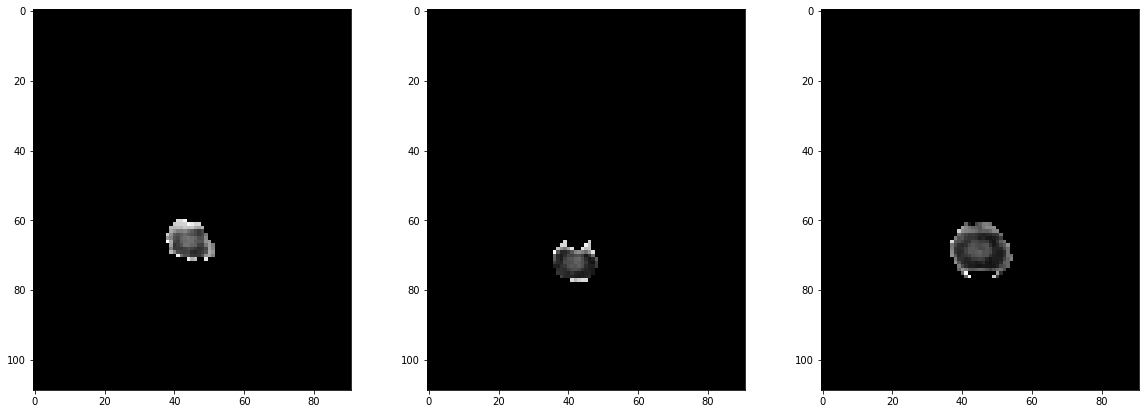


['1911947.nii', '778692.nii', '86823.nii'] [5, 4, 1]


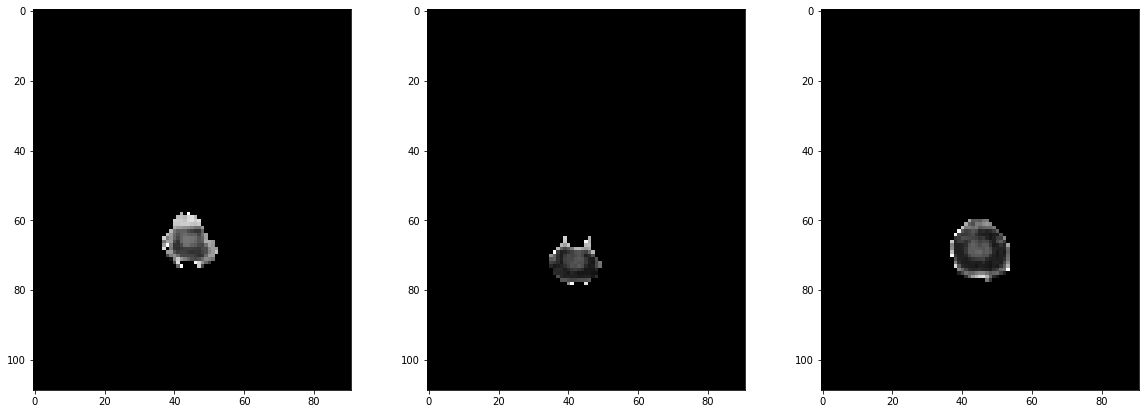


['1911947.nii', '778692.nii', '86823.nii'] [6, 5, 2]


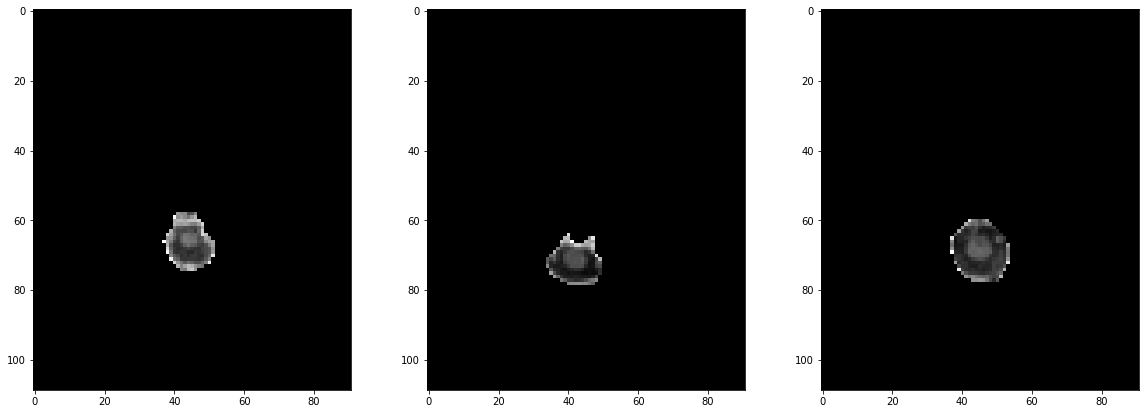


['1911947.nii', '778692.nii', '86823.nii'] [7, 6, 3]


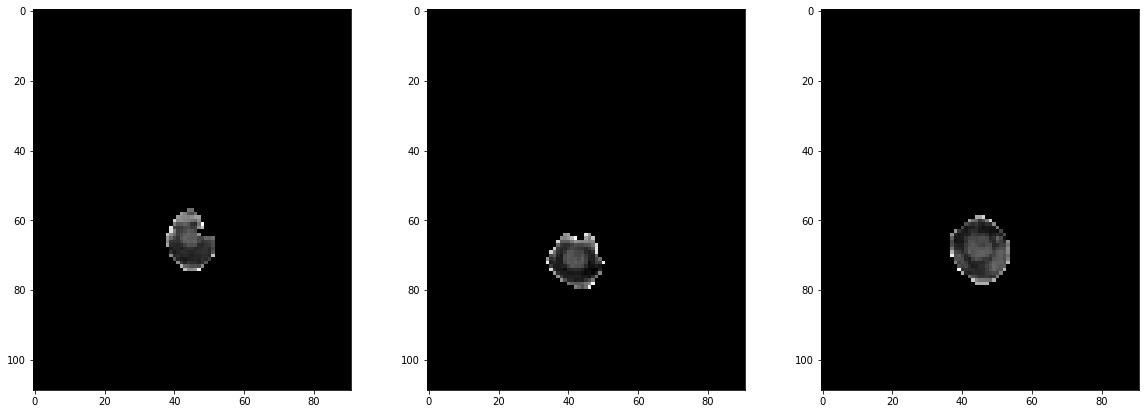


['1911947.nii', '778692.nii', '86823.nii'] [8, 7, 4]


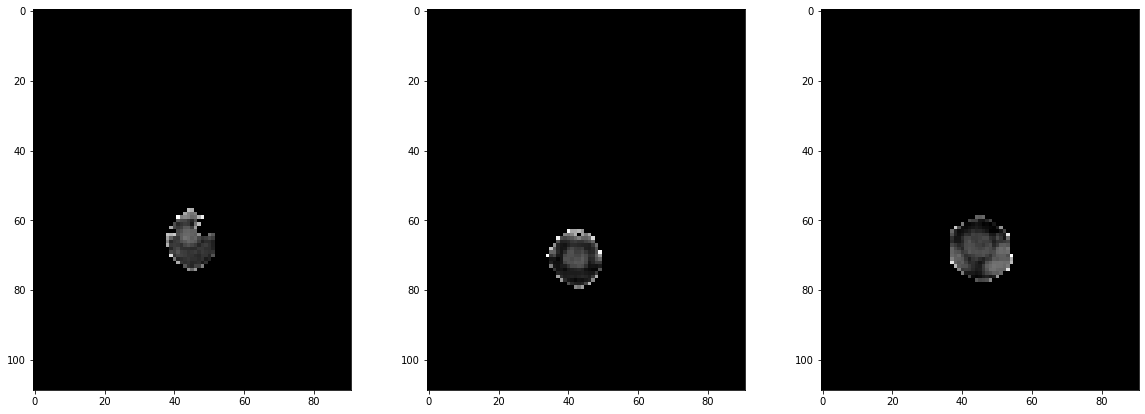


['1911947.nii', '778692.nii', '86823.nii'] [9, 8, 5]


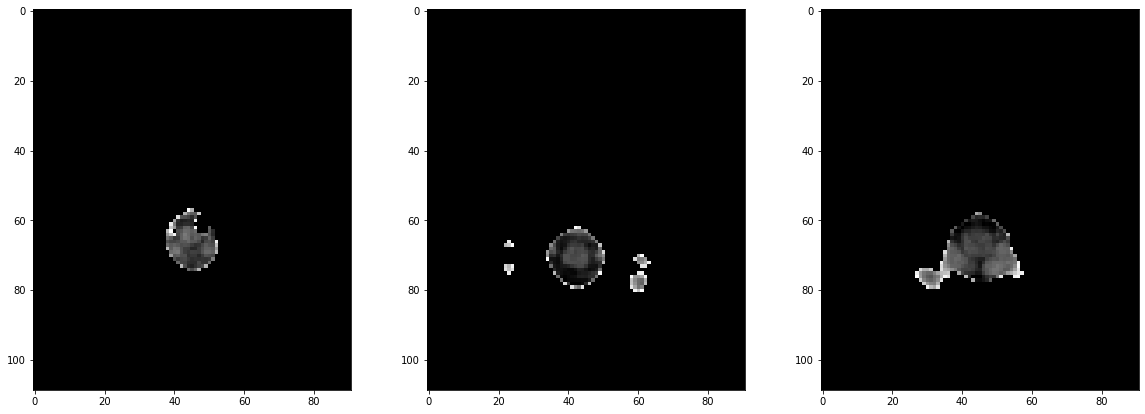


['1911947.nii', '778692.nii', '86823.nii'] [10, 9, 6]


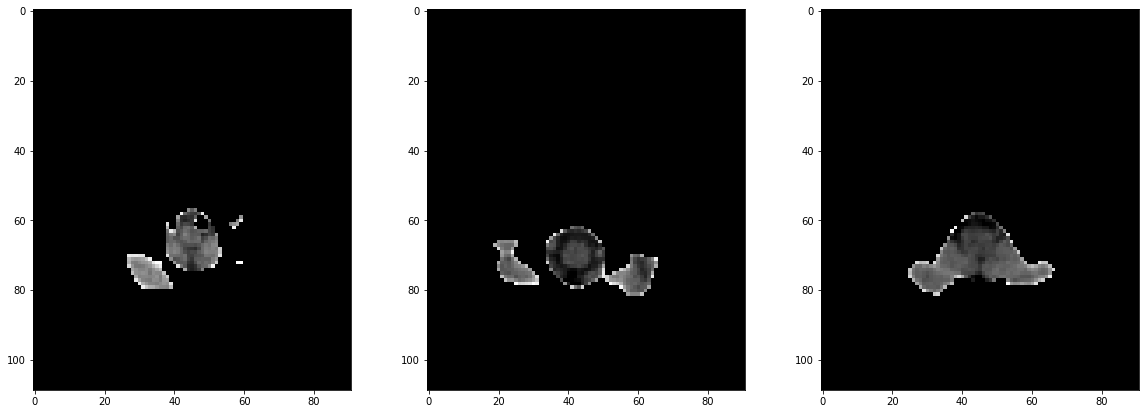


['1911947.nii', '778692.nii', '86823.nii'] [11, 10, 7]


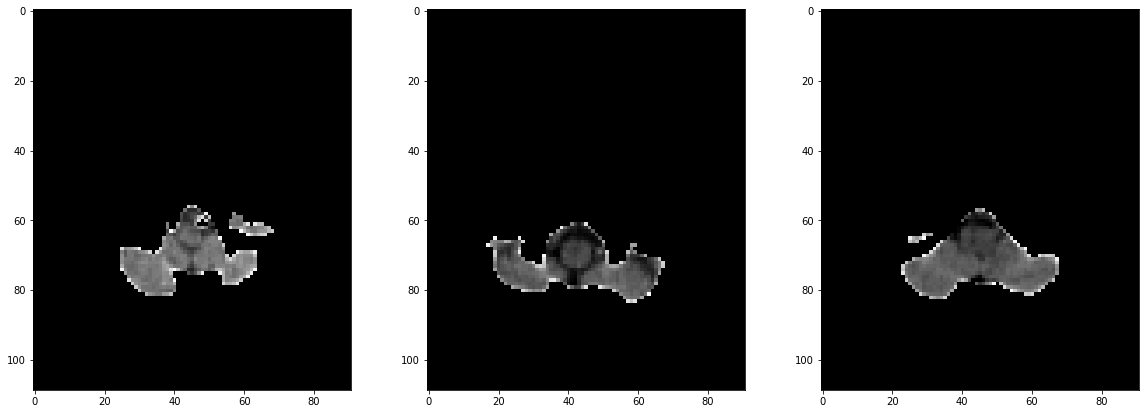


['1911947.nii', '778692.nii', '86823.nii'] [12, 11, 8]


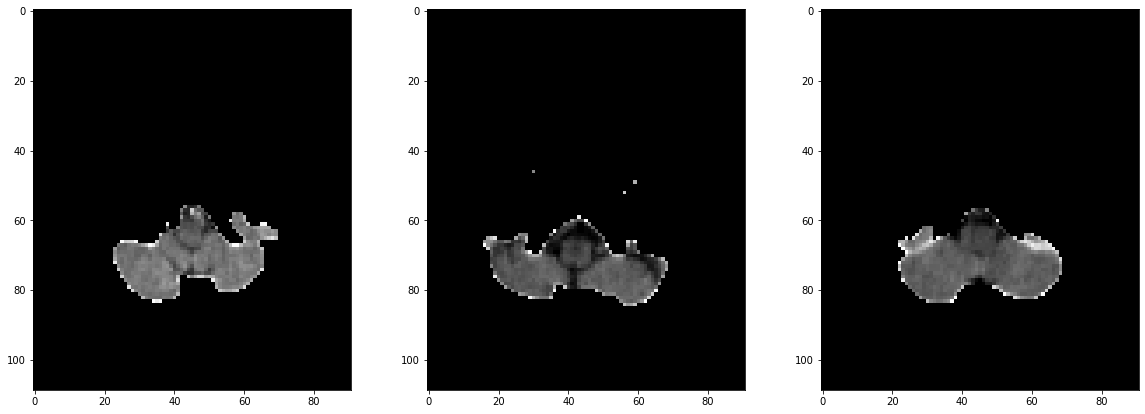


['1911947.nii', '778692.nii', '86823.nii'] [13, 12, 9]


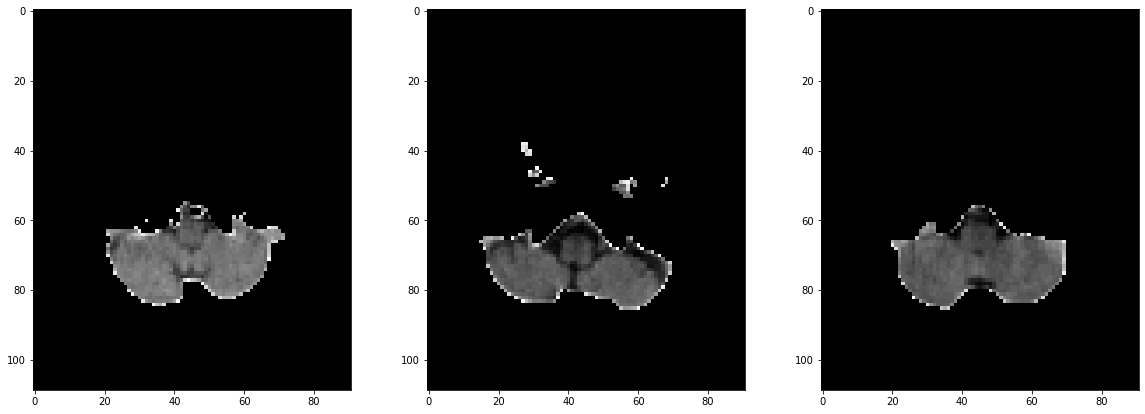


['1911947.nii', '778692.nii', '86823.nii'] [14, 13, 10]


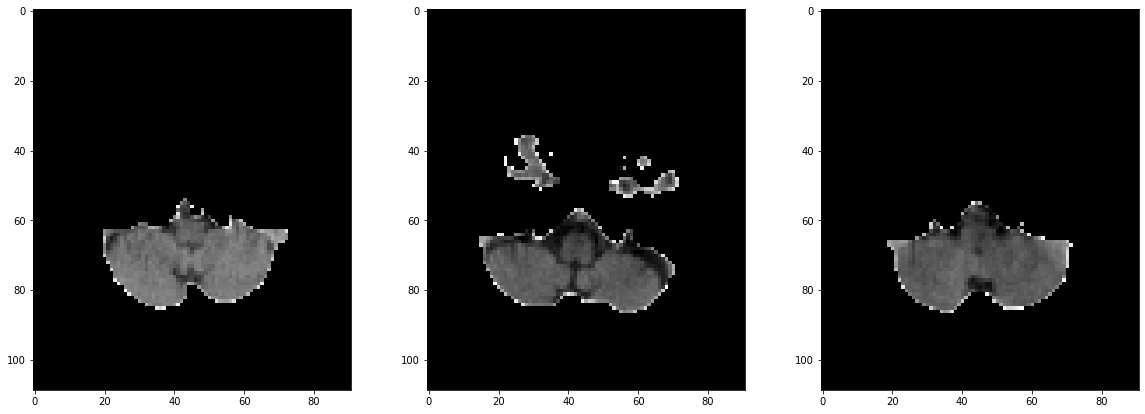


['1911947.nii', '778692.nii', '86823.nii'] [15, 14, 11]


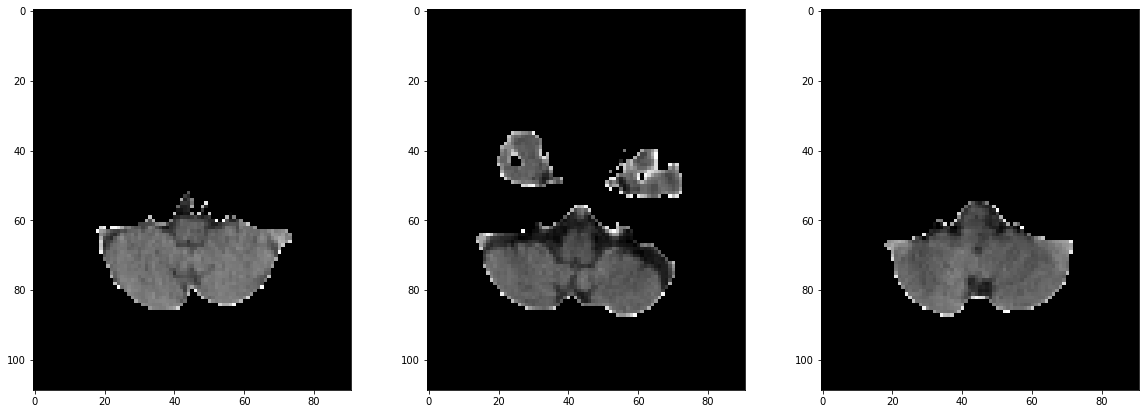


['1911947.nii', '778692.nii', '86823.nii'] [16, 15, 12]


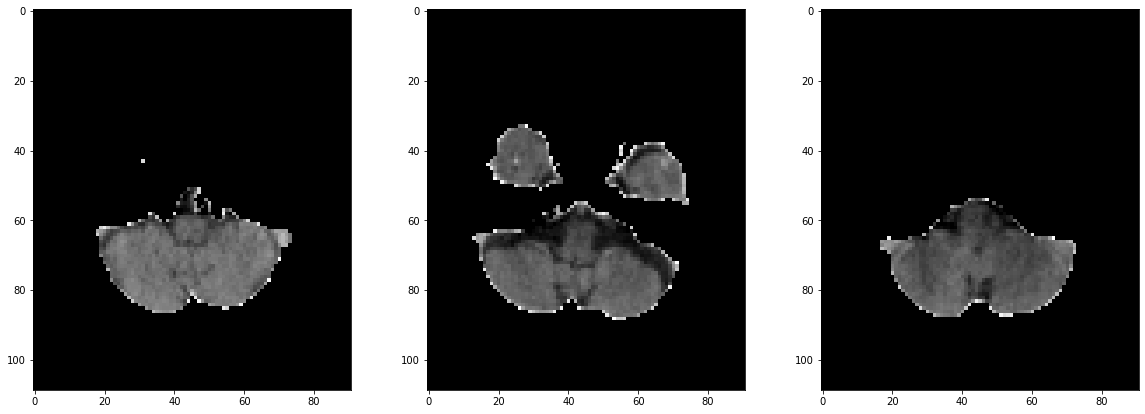


['1911947.nii', '778692.nii', '86823.nii'] [17, 16, 13]


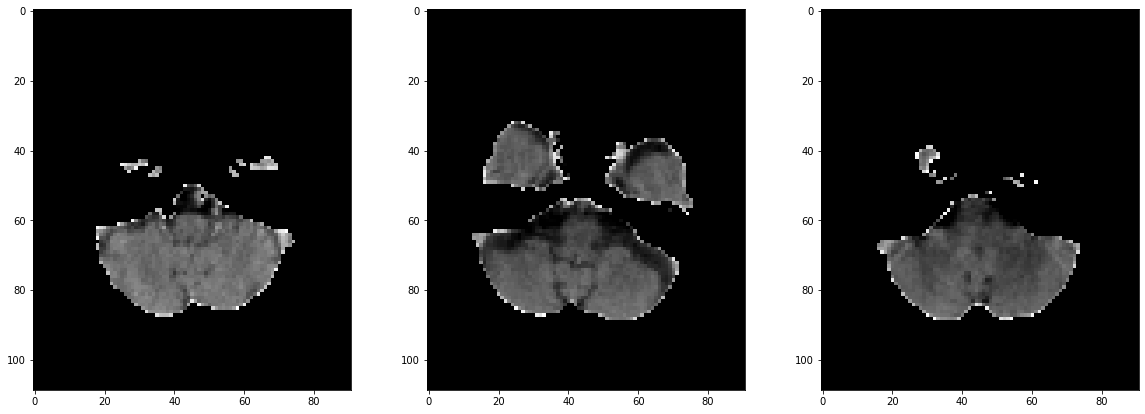


['1911947.nii', '778692.nii', '86823.nii'] [18, 17, 14]


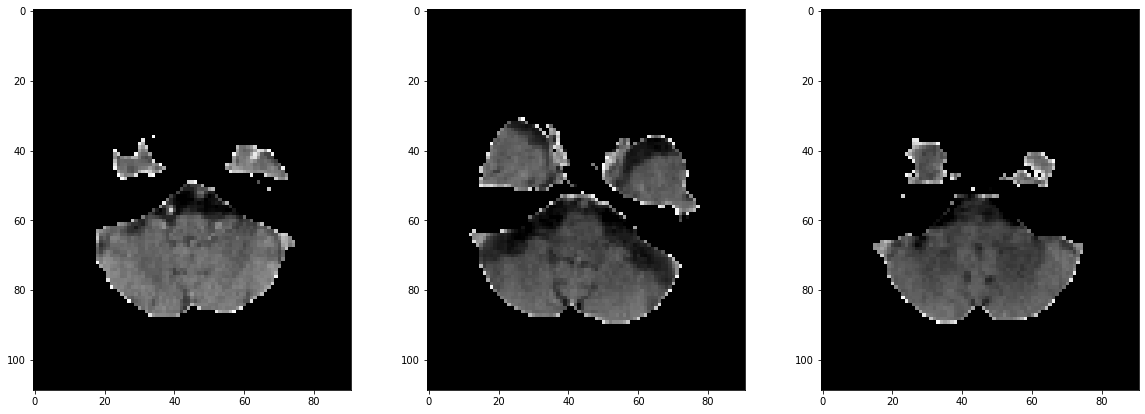


['1911947.nii', '778692.nii', '86823.nii'] [19, 18, 15]


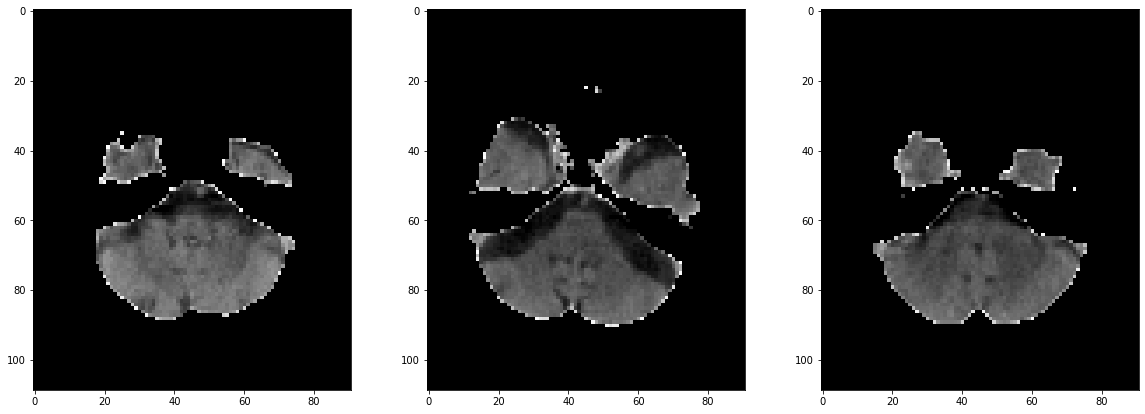


['1911947.nii', '778692.nii', '86823.nii'] [20, 19, 16]


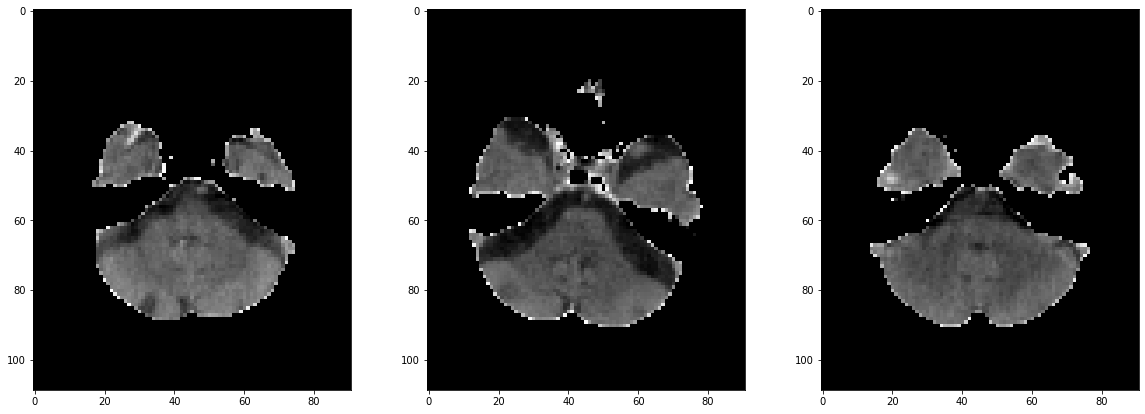


['1911947.nii', '778692.nii', '86823.nii'] [21, 20, 17]


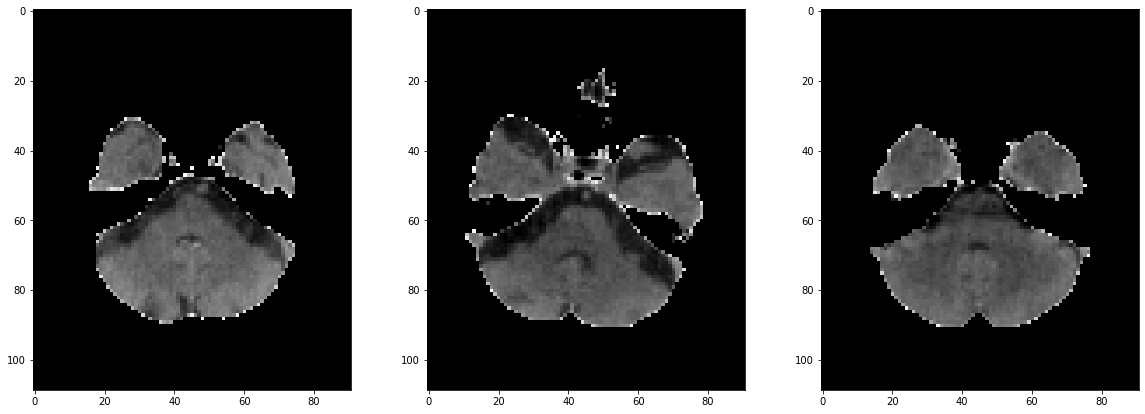


['1911947.nii', '778692.nii', '86823.nii'] [22, 21, 18]


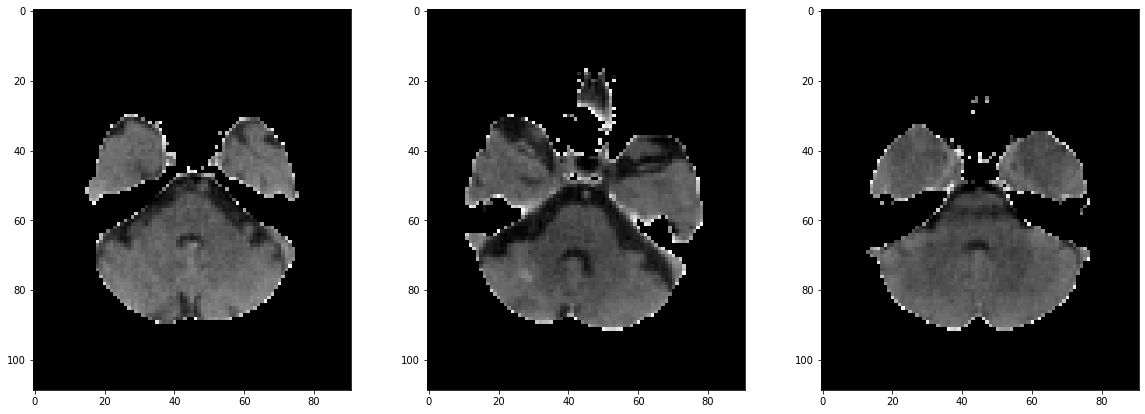


['1911947.nii', '778692.nii', '86823.nii'] [23, 22, 19]


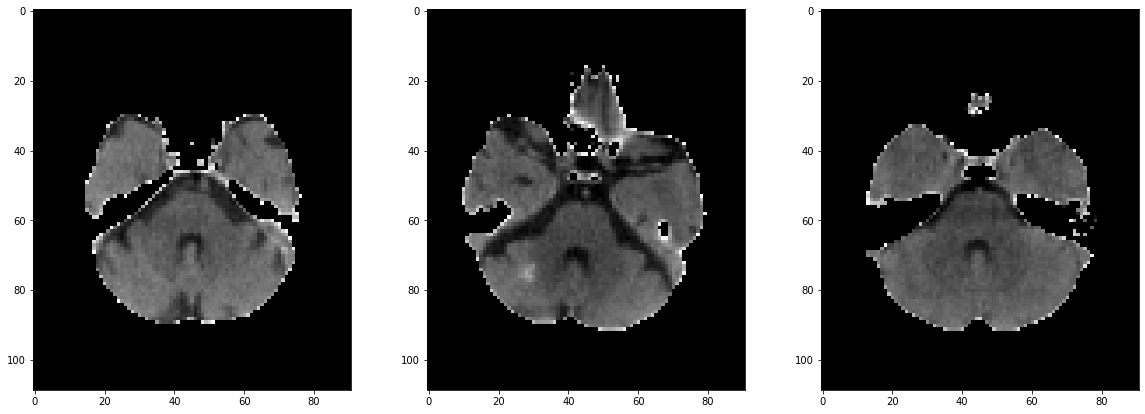


['1911947.nii', '778692.nii', '86823.nii'] [24, 23, 20]


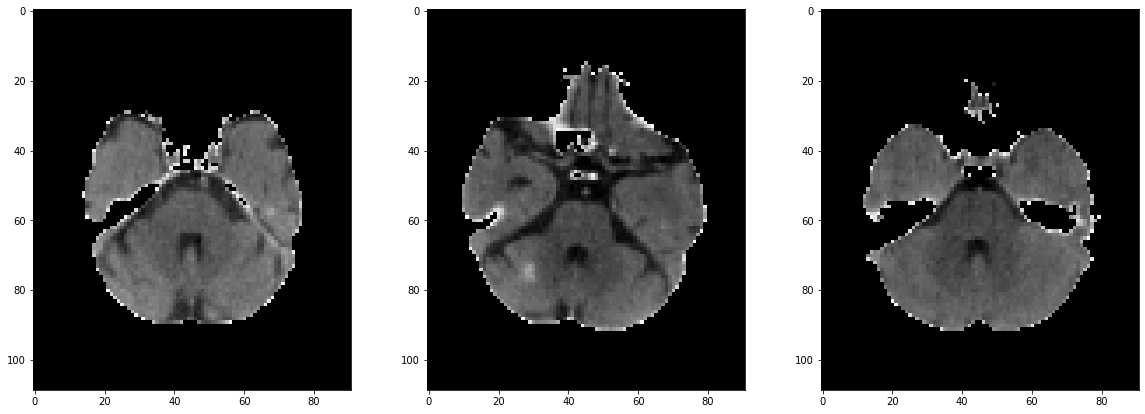


['1911947.nii', '778692.nii', '86823.nii'] [25, 24, 21]


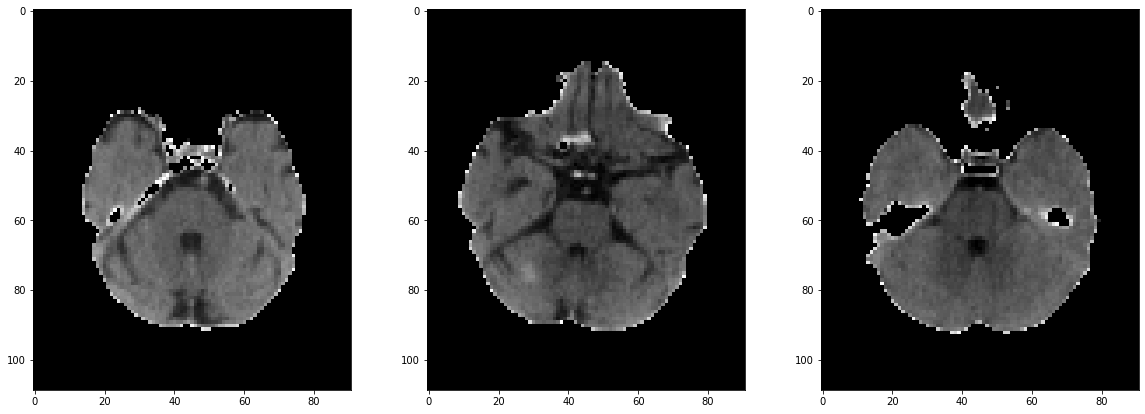


['1911947.nii', '778692.nii', '86823.nii'] [26, 25, 22]


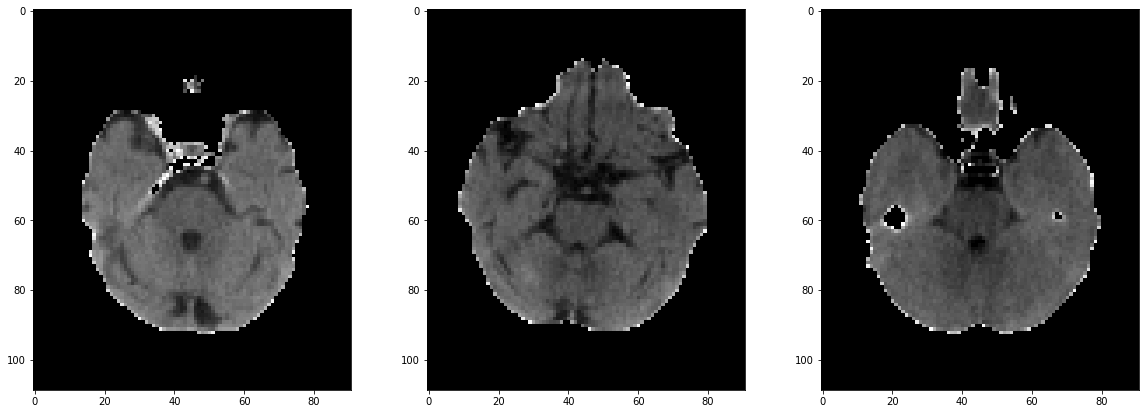


['1911947.nii', '778692.nii', '86823.nii'] [27, 26, 23]


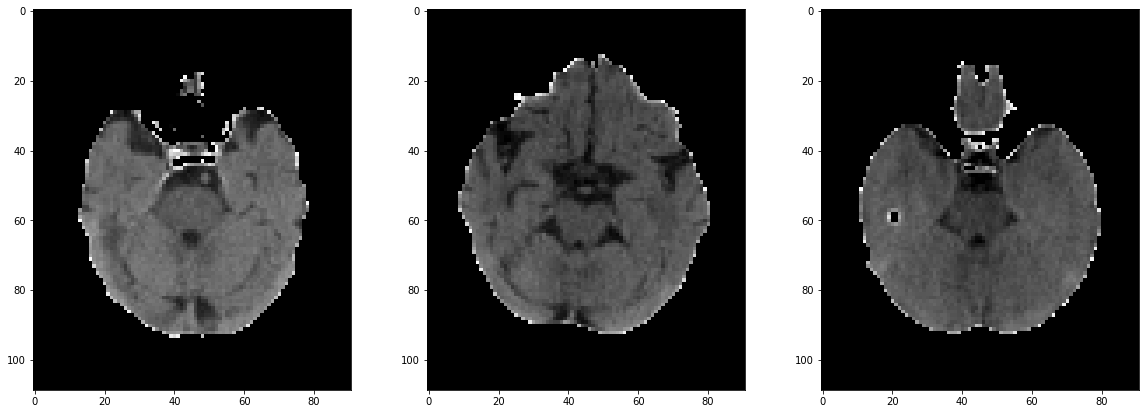


['1911947.nii', '778692.nii', '86823.nii'] [28, 27, 24]


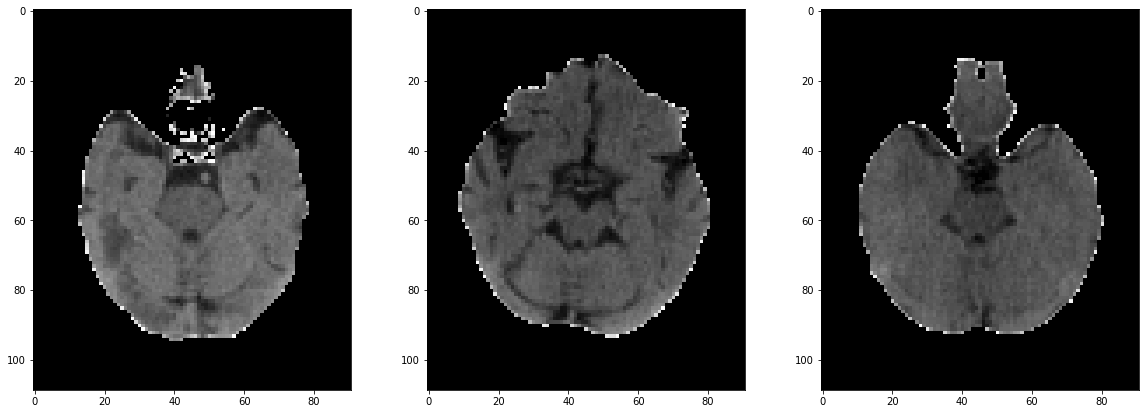


['1911947.nii', '778692.nii', '86823.nii'] [29, 28, 25]


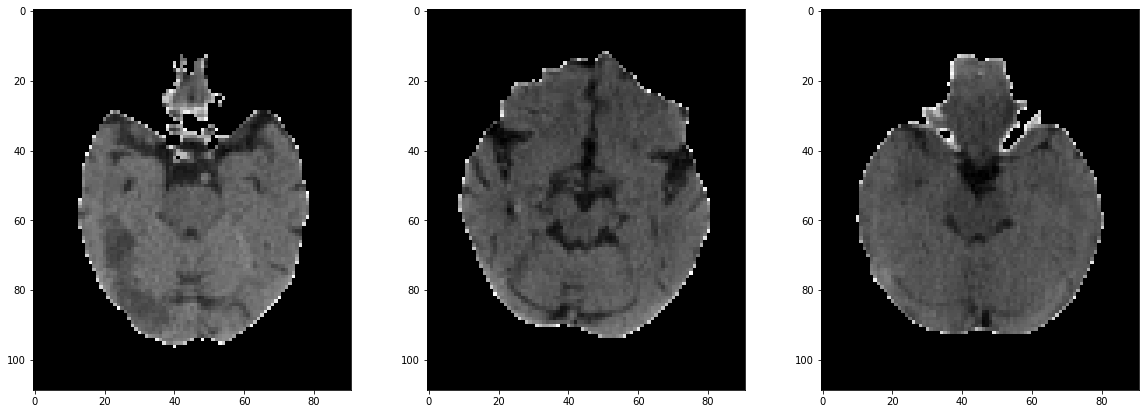


['1911947.nii', '778692.nii', '86823.nii'] [30, 29, 26]


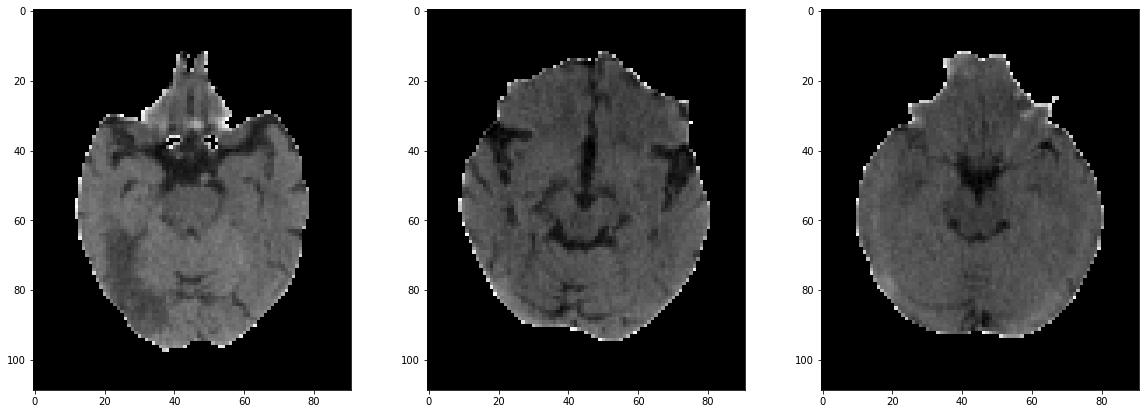


['1911947.nii', '778692.nii', '86823.nii'] [31, 30, 27]


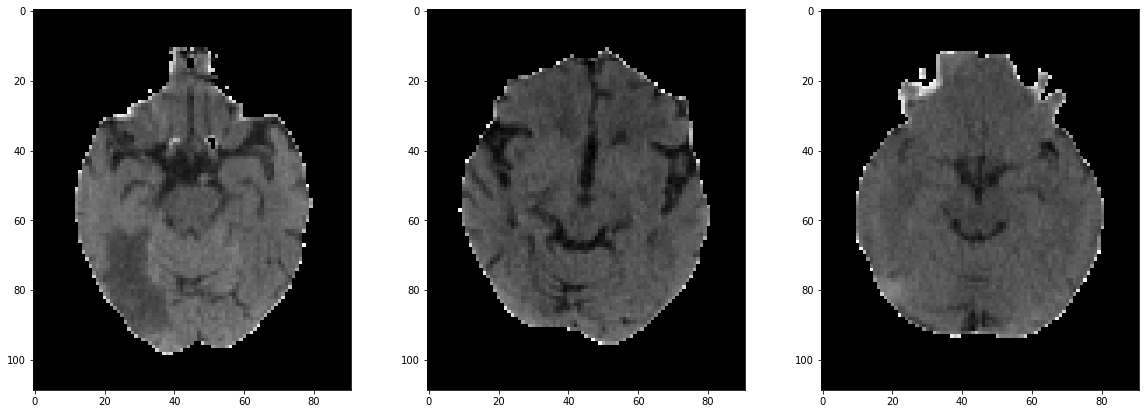


['1911947.nii', '778692.nii', '86823.nii'] [32, 31, 28]


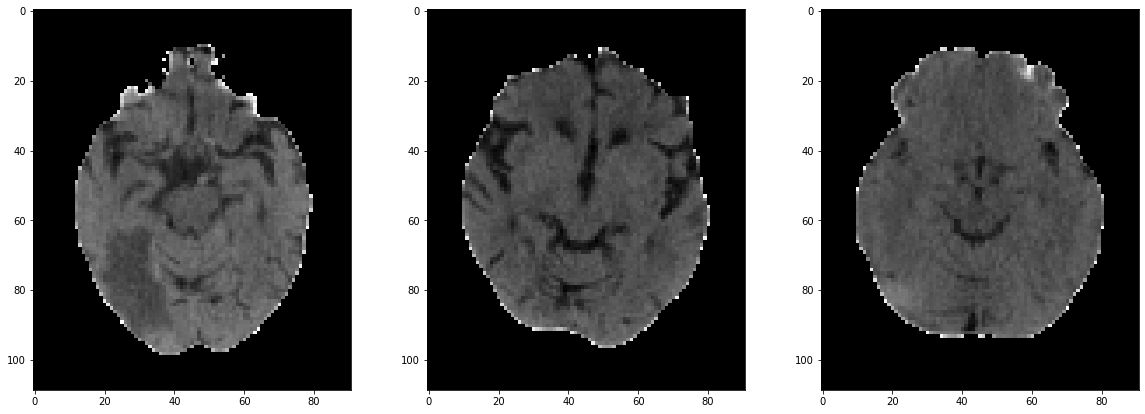


['1911947.nii', '778692.nii', '86823.nii'] [33, 32, 29]


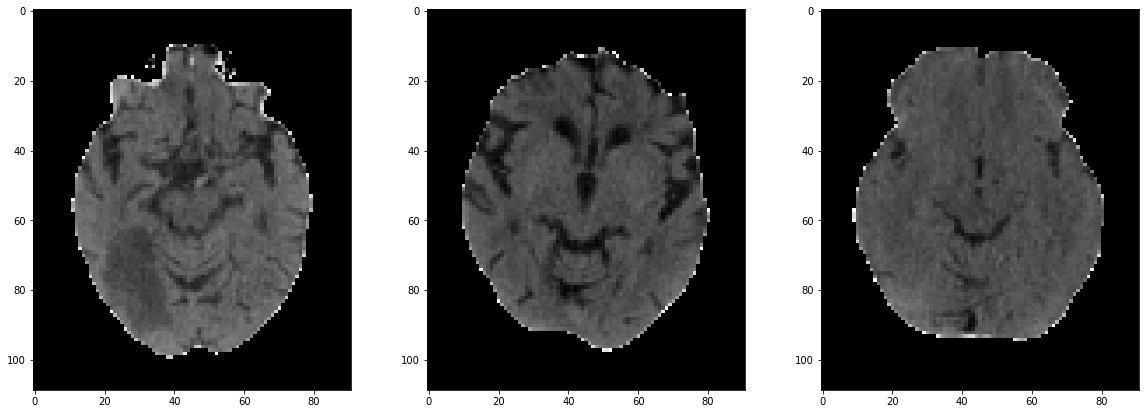


['1911947.nii', '778692.nii', '86823.nii'] [34, 33, 30]


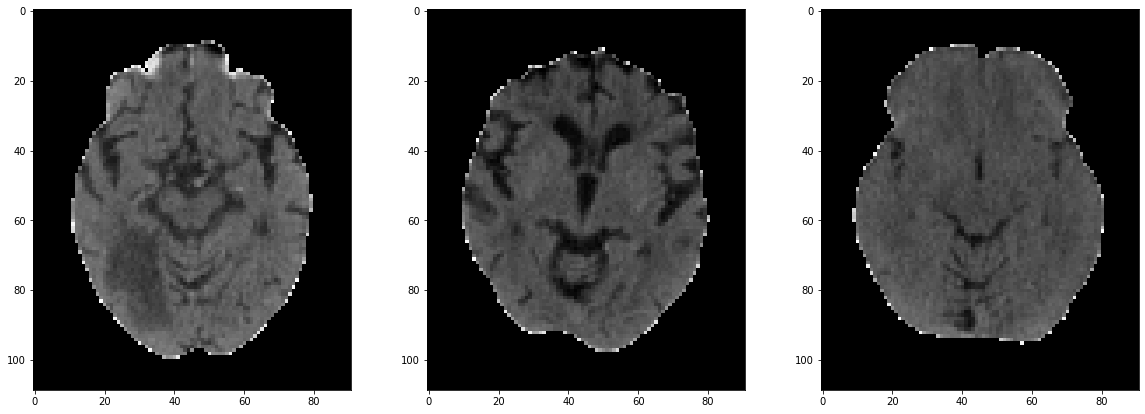


['1911947.nii', '778692.nii', '86823.nii'] [35, 34, 31]


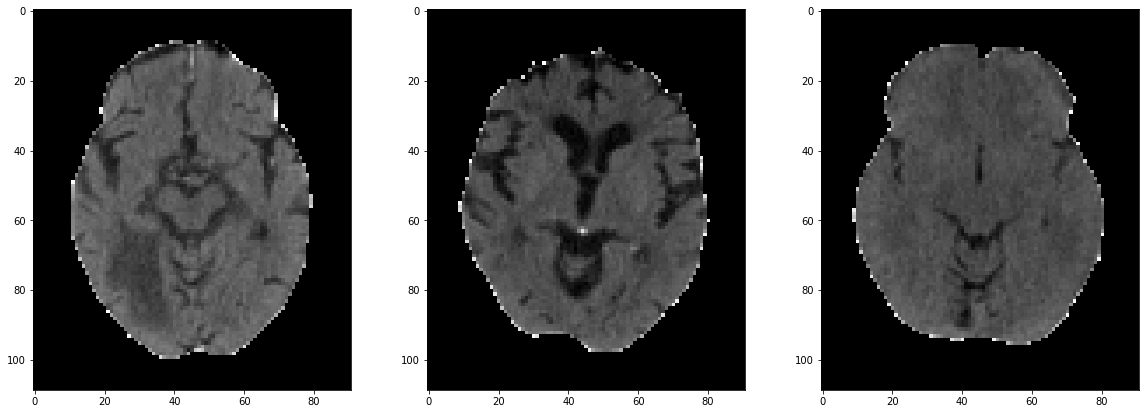


['1911947.nii', '778692.nii', '86823.nii'] [36, 35, 32]


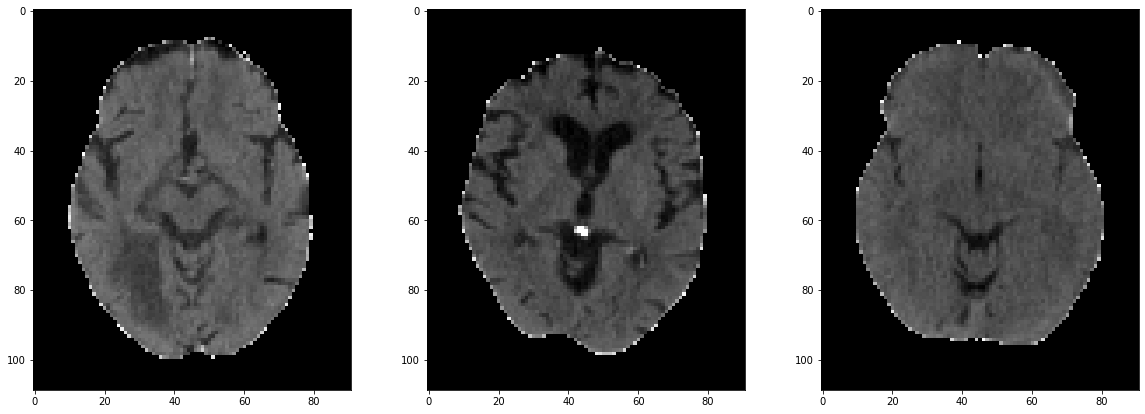


['1911947.nii', '778692.nii', '86823.nii'] [37, 36, 33]


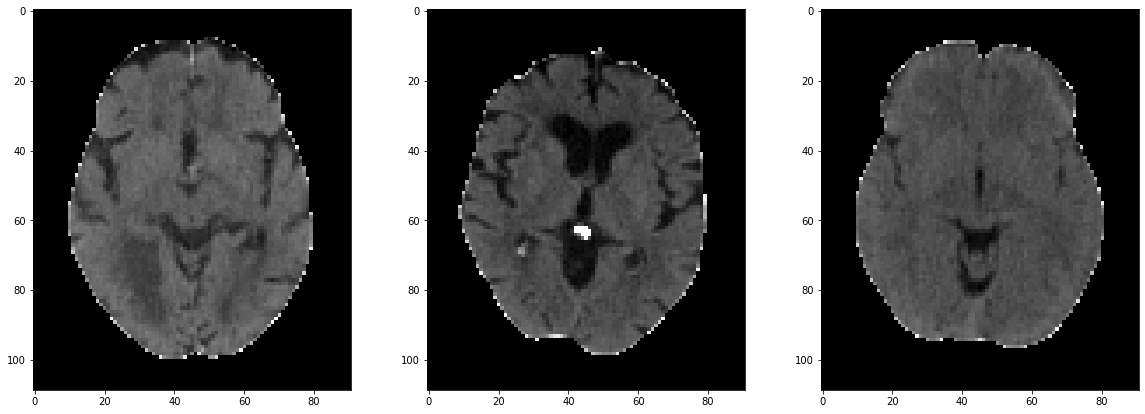


['1911947.nii', '778692.nii', '86823.nii'] [38, 37, 34]


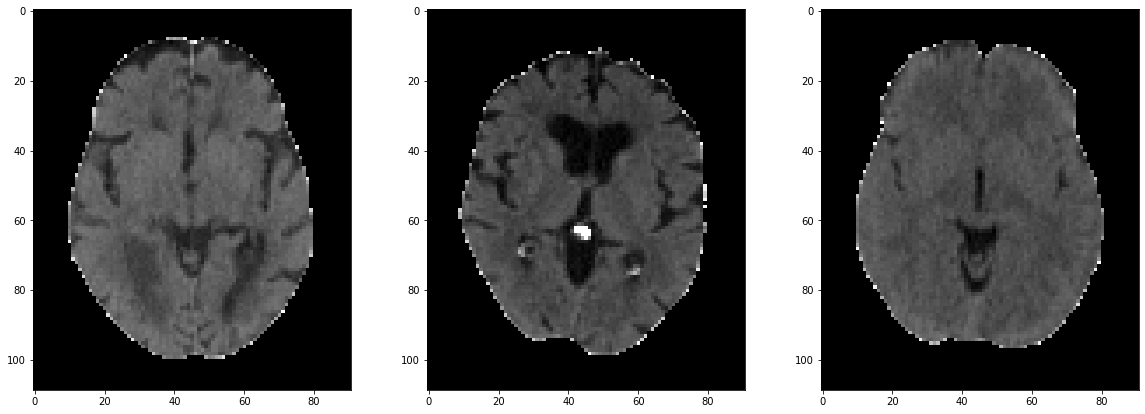


['1911947.nii', '778692.nii', '86823.nii'] [39, 38, 35]


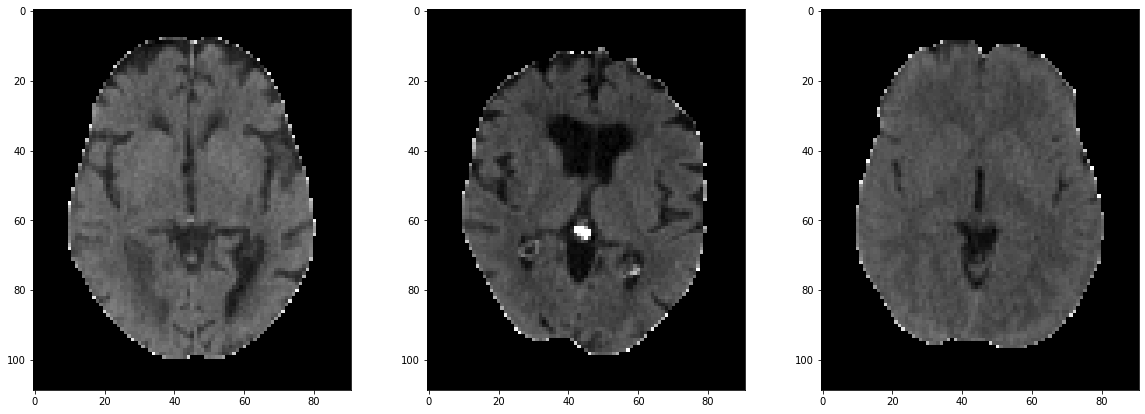


['1911947.nii', '778692.nii', '86823.nii'] [40, 39, 36]


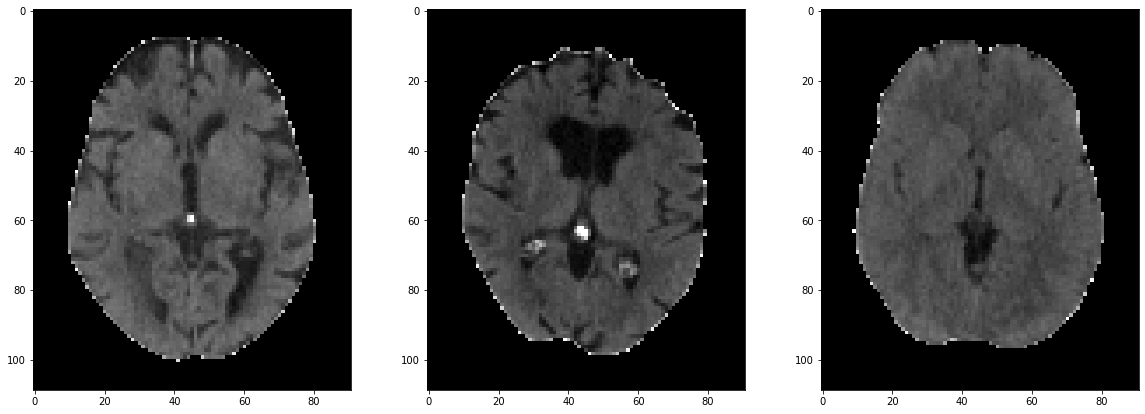


['1911947.nii', '778692.nii', '86823.nii'] [41, 40, 37]


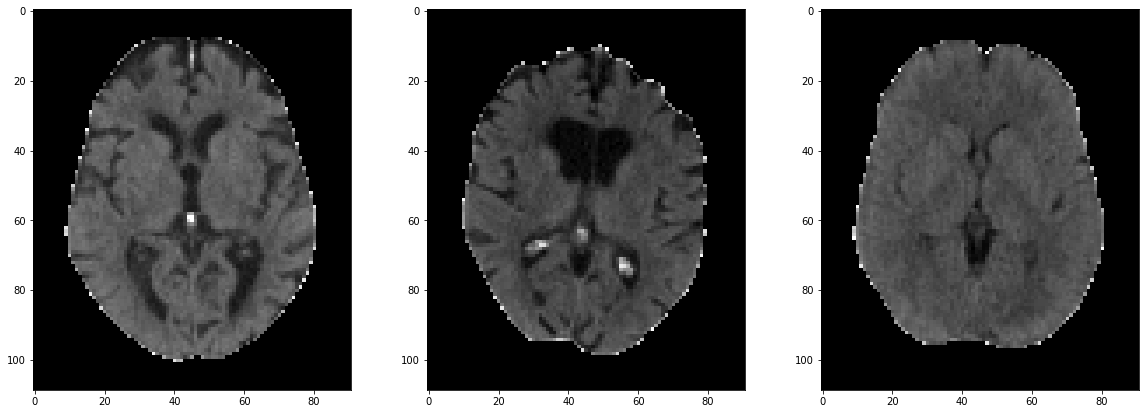


['1911947.nii', '778692.nii', '86823.nii'] [42, 41, 38]


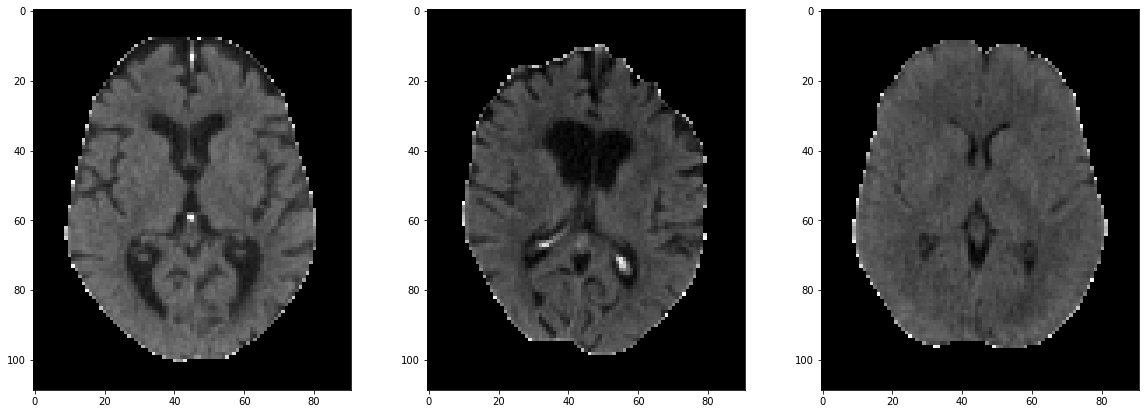

KeyboardInterrupt: Interrupted by user

In [40]:
N = 3
init_pos = [0 for i in range(N)]
sapo = [0 for i in range(N)]
np.random.shuffle(nccts)
while True:
    _, axs = plt.subplots(1, N, figsize = (20,7))
    for i in range(N):
        img = nib.load(ncct_dir+nccts[i]).get_fdata()
        if 0 in sapo:
            sapo[i] = 1
            while np.count_nonzero(img[:,:,init_pos[i]] > 0) < 100:
                init_pos[i] += 1
        else:
            init_pos[i] += 1
        img = img[:,:,init_pos[i]].T
        img = np.flip(img, 0)
        axs[i].imshow(img, cmap = "gray")
    print(nccts[:i+1], init_pos)
    plt.show()
    input()
    plt.close()

## Determine brain heights

In [16]:
def get_height(scan):
    height = 0
    in_brain = False
    for i in range(scan.shape[-1]):
        if np.count_nonzero(scan[:,:,i] > 0) > 100:
            in_brain = True
        else:
            if in_brain:
                break
        if in_brain:
            height += 1
    return height

In [17]:
heights = [get_height(nib.load(ncct_dir+nccts[i]).get_fdata()) for i in range(len(nccts))]

In [28]:
r = [str(data[data["idProcessoLocal"] == id_[:-4]]["rankin-23"].values) for id_ in nccts]
r = [a.replace("['", "").replace("']", "") for a in r]
r = [int(a) if a.isnumeric() else 11 for a in r]

In [42]:
b_heights = {}
b_rankins = {}
assert len(heights) == len(r)
for i in range(len(r)):
    h = heights[i] 
    if h in b_heights:
        b_heights[h] += 1
        b_rankins[h].append( r[i] )
    else:
        b_heights[h] = 1
        b_rankins[h] = [ r[i] ]
for h in b_rankins:
    b_rankins[h] = np.bincount(b_rankins[h], minlength = 12)

b_heights = dict(sorted(b_heights.items()))
for h in b_heights:
    print(h, b_heights[h], b_rankins[h])

65 1 [1 0 0 0 0 0 0 0 0 0 0 0]
66 2 [1 1 0 0 0 0 0 0 0 0 0 0]
68 5 [0 0 0 0 2 1 1 0 0 0 0 1]
69 5 [2 1 0 0 1 0 1 0 0 0 0 0]
70 10 [4 1 0 0 3 0 2 0 0 0 0 0]
71 10 [3 1 3 0 1 0 1 0 0 0 0 1]
72 19 [6 2 3 2 1 0 0 0 0 0 0 5]
73 28 [8 8 3 1 5 1 0 0 0 0 0 2]
74 20 [10  4  2  3  0  0  0  0  0  0  0  1]
75 55 [10 10  9  5  6  4  2  0  0  0  0  9]
76 57 [25 11  8  2  1  2  4  0  0  0  0  4]
77 93 [24 14 17 11  5  2  9  0  0  0  0 11]
78 115 [44 17 13 12 11  1  6  0  0  0  0 11]
79 61 [16 10 12  6  6  2  2  0  0  0  0  7]
80 34 [11  3  5  3  3  1  4  0  0  0  0  4]
81 7 [3 1 0 2 0 0 0 0 0 0 0 1]
82 1 [0 1 0 0 0 0 0 0 0 0 0 0]


In [17]:
def bin_count(l):
    out = {}
    bins = np.bincount(l)
    i = 0
    for count in bins:
        if count > 0:
            out[i] = count
        i += 1
    return out
bins = bin_count(heights)

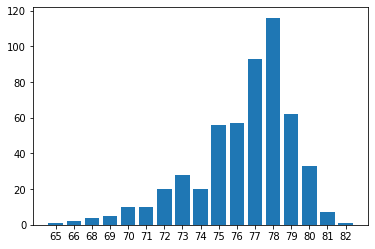

In [18]:
def plot_bins(data):
    plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
    plt.show()
    
plot_bins(bins)

In [23]:
nccts[heights.index(74)]

'2538003.nii'

## Get mask

In [11]:
def get_mask(ids, index, verbose = True, binary = True):
    assert len(ids) == len(index)
    assert len(ids) > 0
    faces = [nib.load(ncct_dir+ids[i]).get_fdata()[:,:,index[i]] for i in range(len(ids))]
    if binary:
        for f in faces: f[f > 0] = 1

    if verbose:
        _, axs = plt.subplots(1, len(ids)+1, figsize = (20,7))
        for i in range(len(ids)):
            axs[i].imshow(np.flip(faces[i].T, 0), cmap = "gray")
    mask = faces[0]
    for i in range(1, len(ids)-1):
        mask += faces[i]
    mask /= len(ids)
    negative = mask.max() - mask
    if verbose:
        axs[-1].imshow(np.flip(negative.T, 0), cmap = "gray")
    return mask

## Frog face

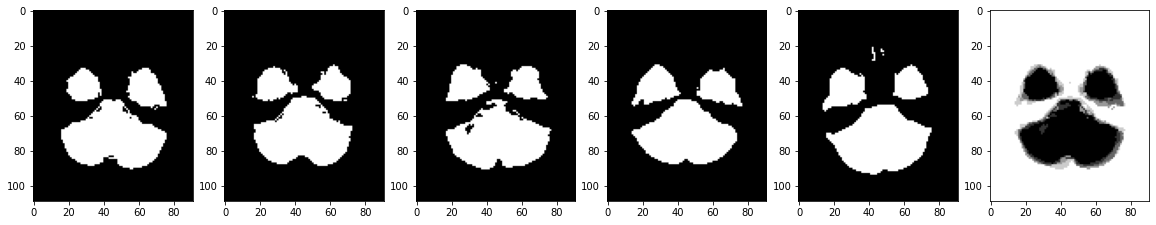

In [21]:
ids = ["2466554.nii", "2630659.nii", "1520491.nii", "2270965.nii", "2548328.nii"]
index = [17, 17, 17, 15, 14]
        
face = get_mask(ids, index, True)

## Insular slice

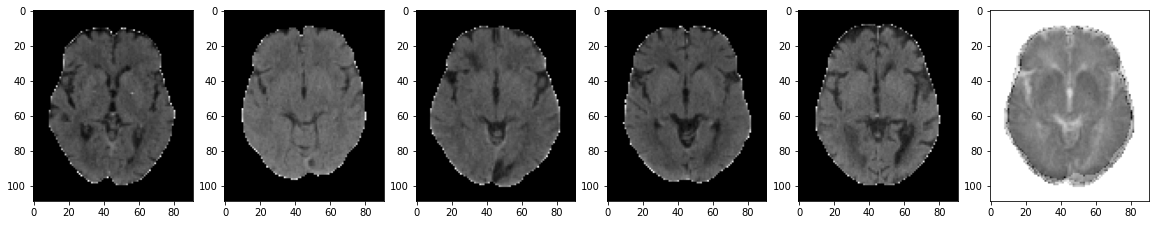

In [12]:
ids = ["1303781.nii", "2520986.nii", "2605128.nii", "2503602.nii", "1911947.nii"]
index = [35, 33, 34, 36, 39]

mask = get_mask(ids, index, binary = False)

8828.56801785928
48263.37086599716
103479.38978319563
208530.1667445021
203939.42202130155
237781.26626117557
199620.02981314788
187883.92143435642
275581.18049325806
787597.484853715
1208377.882943388
1606697.3809543306
1883766.633419147
2129003.157824066
2501867.7644426282
3034873.5535586956
3316914.2975046514
3805210.1892414633
4028899.8915904667
4324238.993470062
4889657.297040664
5186600.415773933
5468702.50130738
6085645.117089465
6853976.282045137
7270965.938712333
7471304.083398295
7629866.288899421
7808888.372627904
7950729.823814087
7969135.437045913
7967893.051321327
8009928.469167913
7968747.955180902
7951426.86456315
7852091.417697431
7706044.410028879
7573752.632072369
7472614.287905394
7451619.983789429
7430692.160486975
7340990.518370922
7173109.455385905
6993892.212133023
6822339.4637171775
6776080.679054055
6762340.856911583
6558679.274723243
6439557.899470658
6307119.5381711945
6150765.6799018625
6052280.880128682
6047231.066420023
6005710.461226026
5956465.247583708

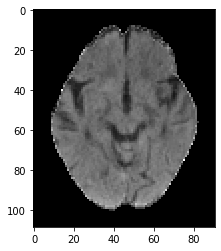


81069.27021293482
149137.79578508044
201802.497136225
233273.0373894925
247865.31584251544
221472.81986220108
202938.272718061
263718.3734779091
437371.4671880533
647975.693833036
980021.305059107
1315689.5534405783
1598783.7396902326
1963062.4306521295
2425289.2840125384
2964134.5126766195
3348963.2272009794
3689679.5314170313
4149689.5711797867
4565971.699063551
4786018.30515407
5052431.797995502
5444326.714557955
5592490.309134262
5715953.6011223905
5792260.689894667
5957795.927448199
6288280.891170718
6509275.217033739
6766916.996001407
6912255.78371139
7020332.4281319175
7164812.446737754
7277684.6440678695
7389610.162359717
7415236.585471115
7426216.505433865
7410273.362590277
7405070.345135095
7301140.522847536
7201038.357397626
7099088.713148981
6971325.5462029595
6918233.9874253515
6873671.144751881
6774276.706453281
6705232.338313392
6680908.468210202
6631631.950551927
6636738.702519679
6641257.699365501
6581723.11260353
6586305.567749029
6494120.003984465
6409725.276758915


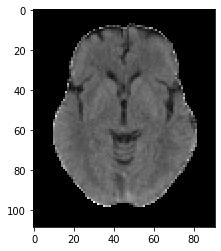


261185.3548169908
286127.3885457698
281182.7895555699
318104.6606107189
303617.28595433116
584081.3284085683
832153.6157112552
1166749.2763580491
1531274.8100870978
1614694.640102275
1786537.1552227126
1947626.0366944284
1988850.5915471034
2259577.5628819484
2731707.123441265
3202287.13690803
3859410.9497576808
4017858.6900591105
4420916.776398411
4828451.634285228
5266938.672091199
5543516.225280806
5559032.469880379
5623509.892771709
5842880.642644932
6225320.151024377
6448407.386437621
7068669.911273403
7151469.852371827
7076257.564745413
7093695.8207098385
7146083.59274041
7247204.612959002
7399679.273008174
7503553.637521631
7505788.997141149
7451597.43542508
7384799.0279888855
7315450.585107754
7252799.405914902
7324125.221427506
7506069.847798683
7474083.83699394
7283335.223483543
7098733.670294836
6974483.053688474
6851415.463240922
6740424.95455929
6733072.483917774
6685616.92001661
6715675.485984717
6753828.642616296
6670625.09957883
6577937.3633374665
6412064.533980971
6245

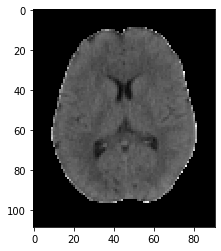


0.0
0.0
0.0
34416.003530830654
112405.76817822928
186043.12727553153
216115.02458417072
253914.06596351022
266443.928273353
268255.232012921
309537.43555658916
400498.7172323044
517461.82912387233
678608.3917723999
1007556.0787020565
1457025.5838910516
1884031.622990794
2338106.898562752
2716047.913626574
2996410.2352506747
3245915.519525031
3474194.380106017
3757986.2910994715
4150354.315466232
4521651.327937817
4825315.563353177
5146899.006306567
5415959.461379341
5804090.466971104
6248114.736283246
6316272.277598109
6447405.934190301
6618175.9455254
6690666.424373493
6748889.4470202625
6732119.711722916
6685975.965150931
6654313.9097883
6587206.635956579
6556408.102971093
6507247.844482784
6410893.045140984
6286322.568269751
6136347.814774971
5929943.997404063
5774664.957255944
5629830.637631822
5526507.848529379
5378799.606341222
5287482.561796197
5257991.864794063
5222753.616500464
5159839.515154852
5106197.430189113
5006079.491535533
4935385.174249445
4883953.303871152
4872025.6

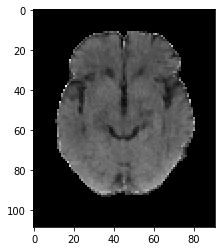


0.0
22712.304213034724
97796.4106547934
150054.88694561698
211387.39973998687
245865.33966906823
240974.4317525554
224322.04340443548
237329.24417952236
284547.45778558013
525872.7809138779
757138.1216211808
1059431.5226258903
1362949.0943007325
1677591.0631371103
1834777.116988927
2114649.1368632168
2623348.6685446706
3161982.2595531
3594609.8784628203
3894064.9232512806
4186733.8404899817
4656942.393292185
4898854.692384087
5078790.306268286
5362877.11458731
5835087.258840916
6394638.714292042
6741541.07130197
6835951.43580687
7224613.826827521
7513391.133853597
7819751.238395445
7980573.570679743
8015166.539007219
8118647.110287076
8135001.609646364
8078082.04107621
8016622.340062974
7974007.402861709
7931164.402601546
7820735.263834067
7733816.978406555
7601530.099481564
7474325.699883769
7276512.347447293
7125170.11900468
7050936.629313346
6905557.5031642625
6799032.948826582
6744406.87961686
6727620.616142213
6719716.349678799
6728422.525696534
6625843.084022282
6518553.32119629

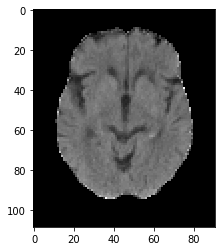


230491.8697742502
291257.0719384329
307105.819567045
293533.47983902006
289010.64978386264
406634.63214629353
900383.8249203581
1424327.1424691167
1955518.119125769
2350481.7100134394
2663247.228646257
3056246.670861945
3617413.0271437475
4225217.085536915
4761161.170564452
5221334.344154645
5624464.1175462585
6048979.972430281
6367573.6163599435
6567619.606204724
6807678.281538139
7242137.933091742
7693849.310097671
7867343.115707576
8071867.678646481
8534027.192874543
8991974.774509156
9666295.528060164
9879100.089712044
9939205.422404177
9975991.470762216
10005816.463865532
10132900.769517006
10214211.666534739
10237663.239093434
10222095.83084376
10154751.083827782
10114578.986974841
10004208.229866354
9903400.855122203
9728790.517065316
9598848.403510954
9499959.62181866
9338704.427647714
9212457.702353215
9133274.770811144
9026781.486354515
8965556.292477474
8919223.503306754
8887961.06475422
8818579.65540544
8734456.884752959
8564177.252755968
8393012.198248148
8164919.95462407

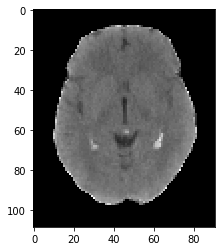


176176.65890453878
208451.57235341473
229930.02586145786
203417.8801563369
205869.3331370825
314821.0239636075
516664.56513861055
909653.5264328511
1312715.1316039062
1691602.37264133
2087445.413505434
2299838.2269513453
2695651.9363668314
3009507.13592188
3215391.7922621677
3480513.79214453
3741705.891758862
4110601.7247688146
4505672.754870779
4750374.516817864
5009974.427276261
5208520.024725916
5463805.52448789
5952124.017415607
6168006.100350522
6474634.594644836
6819316.43490845
7040426.467884374
7335609.36397557
7359341.338227545
7458799.363507331
7503506.497341045
7479293.994493045
7459810.481768415
7378282.95907566
7254400.114718379
7183163.476984215
7076141.228751557
6993807.9216871895
6908655.287279056
6832797.648092001
6730654.646303979
6553103.176781234
6376307.884942879
6263515.276334571
6180195.587464338
6076321.252410572
6033368.858967254
5986063.493599861
5997847.250782549
6042070.898310673
6023933.217278665
6061590.920006198
5954238.959380464
5774664.045926267
564247

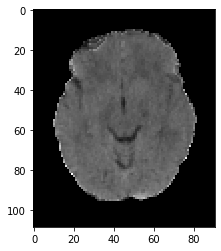


0.0
20096.177245576335
56930.60591779629
130950.09445720408
251004.9017956814
261323.3948637491
238841.9396938437
536632.7314338726
1004057.1354969182
1375575.9187695396
1579689.4251852785
1833970.5688868102
2013723.2494020616
2131172.43880662
2092424.022666051
2105027.655640698
2210297.6007247684
2275256.2814927613
2293441.304737931
2507824.6159245605
2898320.893108972
3219543.7986184163
3520941.5632833433
3806935.8676329507
4304743.680020249
4785787.94429767
5390049.432318635
6091675.956769546
6364506.177423624
6331952.481285022
6364128.651041396
6599093.695902441
6715936.745333583
6879566.564405078
6887728.720774293
6876630.080281862
6870323.40578325
6886361.368954942
7021500.546696643
7141479.992554299
7298102.08652642
7326108.833759283
7315472.753153211
7163302.909741295
7072392.474202954
6968872.104710652
6961578.63918677
6838949.708309184
6772669.442211404
6751352.249743335
6706619.666205716
6707832.028580617
6641842.127672939
6498338.002241224
6405894.07184835
6221423.64884938

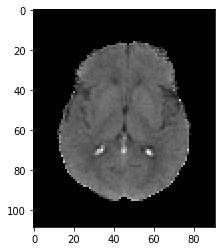


0.0
0.0
8660.39566933847
78371.07632610662
117392.77502501929
155941.64409858763
175891.7674826676
209224.76870095817
219534.12393066066
238704.2769767901
382044.41032778466
582774.532187405
940592.9000068762
1283051.8709805405
1526176.24044267
1880869.9919424036
2446022.6498197485
2713578.3215770526
2990058.3828424737
3269143.0705908434
3609206.7530327714
4013183.881826222
4382521.712363998
4728646.737856251
4890016.960629639
5194726.221655858
5734907.330226071
6145656.115685217
6079352.156231927
6392429.627671429
6532403.519308826
6583496.1103857085
6693083.891691531
6820355.968144108
6873236.395028121
6842135.146171421
6736707.384790794
6719709.459357473
6664774.440990542
6623085.003028467
6616675.480436213
6565948.7741753915
6476412.310037577
6345766.307502346
6125322.177345273
5897770.759824997
5770244.722100072
5710501.8941377895
5561043.616626961
5460942.058493709
5430937.968701102
5476354.0064758025
5442701.351902425
5420692.662292322
5295056.282708357
5261200.049292484
513534

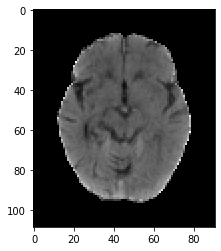


0.0
0.0
0.0
9174.802027782262
52493.68780260529
94706.79601220286
134569.39961426065
136379.5794317031
152925.57227918797
157513.59280909537
181307.106994947
237071.20569596297
842762.1816428263
1602538.3493225987
2072600.2137766571
2435458.302610042
2800389.2953623384
3093693.7997298394
3397941.6921665245
3684519.8817272913
4053163.5799844754
4386001.370139881
4832981.3545275275
5244308.608590799
5352659.649621337
5641388.770624352
5786045.06487259
6160894.599868417
6242207.304963472
6375525.575444343
6621322.430756031
6805052.499925231
6958552.918190491
6981510.405490087
7037812.151665049
6984404.645659796
6953030.247432962
6896749.928097796
6812267.747559604
6730513.827297848
6672036.811311444
6654763.702321298
6581671.692025647
6439248.655596837
6251409.668952012
5964415.335689197
5778429.695560443
5675579.772419971
5671226.736370259
5629512.964213191
5528353.243174079
5421261.167562738
5359361.774880568
5324855.920675118
5269032.101520271
5179923.824605728
5097743.691662934
50462

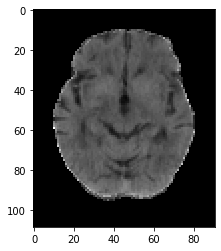


76254.48091515256
147287.48044898023
245609.7135639833
267433.907142844
301282.5982037053
294803.9620165623
308049.1436465648
306155.0921591923
321537.85813985544
347738.16090951825
414660.1828318052
484672.3830469874
730450.9927043808
1017582.5496054227
1498971.9075338377
1822930.1198478304
2244435.0810201326
2709589.226596364
2949855.275929164
3390098.9801098416
3908451.3756612455
4237738.95101253
4621225.230765322
4866686.365448786
5152818.513132516
5561482.48505221
6096702.972403295
6354169.48097758
6577682.966888105
6855594.556373797
7068704.251033185
7171834.508451763
7390622.340131841
7709953.004508253
7956229.565736677
7989023.759178812
8169731.708685628
8241096.876623256
8320663.478205115
8369677.797022281
8400671.947826676
8370903.547746349
8256065.1361440085
8093116.6980187455
7949708.3479560595
7878912.048288249
7823074.278796527
7690863.493438233
7556497.442733499
7456419.911071699
7433585.601098124
7324704.7256362345
7334958.315509986
7273346.881275206
7081865.335496314


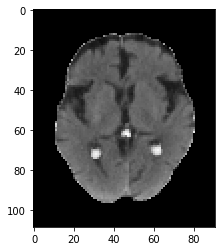


0.0
3971.2755837303757
58334.94799654185
130232.50135275582
206633.1189803908
315264.4752141512
380274.06071264733
355514.5291230107
310989.96265430393
280281.12289547396
304725.7225793275
465120.0429872121
762210.7684388881
1093830.8434864234
1354751.3064361028
1592747.8994523925
1905217.2629963134
2321396.2766980827
2845661.490727037
3469189.6184745813
3845128.8620270304
4230826.667118589
4699493.267864706
5248033.065102965
5701762.089090603
6096796.81031664
6410623.06823919
6623336.126125312
7034292.3310984885
7358814.568623049
7520874.699653559
7757694.446763165
7858674.464839902
8019247.182358246
8255690.643651696
8367522.851855032
8422557.656234521
8482253.90789114
8471937.062855551
8435177.050438164
8403595.969722891
8350720.01149396
8286924.101750016
8227279.345762843
8206914.257844814
8048520.303687109
7849667.105279189
7697474.26716021
7510696.145646667
7396636.4584735725
7258006.885872593
7164840.374538636
7092348.696487441
7030056.472954167
6989683.429993731
6867571.572128

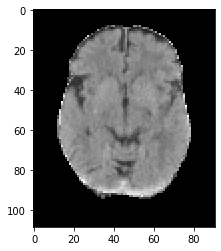


0.0
0.0
0.0
0.0
0.0
12287.663698553522
60187.72588476322
111548.70339527217
137270.57214459786
157391.86296422948
169862.81975522524
167730.41948292777
168453.2305033638
241752.27871056407
724308.8364195204
917365.0166424139
1214469.8265641825
1699190.10179684
2166107.0929189613
2575208.9461084073
2907708.1066215597
3223487.8539914023
3470029.009873474
3793301.887417946
4031238.038686918
4319680.992897991
4623593.128695913
5015171.519861501
5366545.656158314
5596029.982271052
5632712.191105226
5999321.9179333765
6309662.995921899
6540383.74780697
6522916.056296904
6598263.781667727
6591494.024389855
6589177.437035505
6504483.91087073
6381776.889501296
6284308.894970379
6185106.37336709
6107078.038203787
6026157.412126652
6036234.129682694
6003663.599288377
5902327.343577824
5642314.386992607
5528307.952261532
5451075.753031138
5360877.331185589
5266260.100036673
5146142.517856728
5029445.431695358
5109262.501458371
5165558.274431804
5176439.49526582
5193348.876361303
5075130.339129759

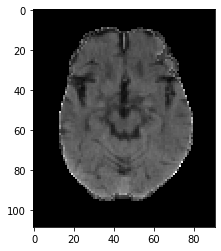


41495.56464203415
96465.34921673323
160646.44482083706
220595.51971010846
187760.9011631595
162121.07180583564
215465.3724906352
549981.3817540836
950279.1272606235
1324245.3779729907
1557952.8906272019
1726337.2303714298
2023843.1181724626
2377066.3048174344
2584117.9061214826
2869735.295608728
3334806.3839839017
3817255.1440463215
4281886.472875102
4635618.30583087
5117053.121207617
5828799.26951597
5771759.361465673
5280068.135866668
5973471.931675234
6419991.875293551
6569462.291653685
6523871.141001098
6680897.250661372
7040460.918034044
7161473.286891331
7280199.257017995
7393058.275107875
7317155.090352388
7136625.316626132
7051154.113324605
6967914.577535791
7007928.165881813
7052369.685189466
7042533.275076227
7067455.920491277
6988554.157109117
6981705.656468787
6866454.051690656
6778506.035554668
6646240.989235247
6484012.310158146
6466507.823332374
6414038.8685628995
6319949.865863478
6224429.356755154
6257637.728461998
6209247.904474037
6138235.876776332
6002536.075389887

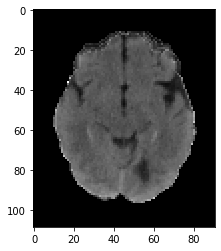


51535.01313360817
118951.69545808513
209739.42198204857
259305.9834094901
266002.57168619294
321134.8355830205
305080.78289268515
333758.03607010737
549627.9210025666
808577.5129551657
1153487.377103393
1393521.443145441
1587443.4440642223
1778250.3449043278
1918432.790987901
2007304.7849095971
2233874.3392247744
2619854.00119734
2964938.0627373643
3221028.152608754
3442435.957999126
3764995.2923899996
4072143.5008284096
4376609.118767493
4873618.061317036
5389705.605789997
5511638.929964667
5655059.022610485
5624346.8698027
5794752.849091801
5851414.502747189
6005368.619189675
6086323.862024577
6236651.483120966
6265406.409569331
6258483.712222846
6281138.408946308
6445550.439409883
6454160.45003883
6400840.020047198
6373750.979327253
6310855.426977867
6211420.79111609
5981490.630017233
5694399.243852116
5517241.037341799
5467226.7386318715
5487192.821862344
5526752.409521099
5499254.477351674
5512261.640087853
5498410.342031581
5428115.645110086
5444578.337172598
5364391.050442888
5

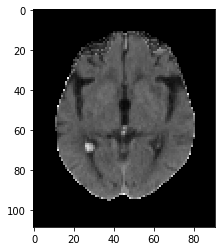


250051.44348180652
287442.67104659055
340687.35622534156
389083.4223933458
500421.6634257229
686589.7893223653
873575.7340510695
1163453.5652911053
1456122.4858019624
1715375.1183319779
1820271.053726695
2015110.820207715
2346226.2849376267
2962938.516879664
3273781.399796974
3583485.315102269
3922813.310435727
4318462.085371126
4632712.329466403
5128484.769429405
5540605.15417498
5661342.151687693
6020164.345324035
6330390.562986534
6630448.088939754
6805170.967266868
7004731.874608132
7252117.0066829445
7567784.452452261
7761570.237099155
7765054.160748861
7809277.590067563
7795257.516367959
7757516.036206562
7728232.025922859
7680350.849267261
7627101.227031119
7652514.3872439945
7637933.225320738
7647827.086885476
7603651.757536316
7495646.284286998
7429770.7676262325
7297222.07518799
7221600.697264453
7048860.231997544
6946839.422549511
6808389.484682442
6764724.80935603
6703261.042982086
6634285.6997070545
6553764.370367136
6446283.509811004
6314810.68401384
6261152.81037701
610

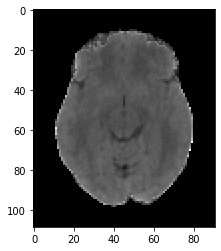


202700.54880185355
237706.6213034006
258667.85288114214
284671.40551100904
349952.96739161754
509369.9300500854
977989.7641144984
1201219.0252236358
1492754.430976488
1768036.4605460358
1910258.4030163076
2106650.341877002
2431332.1474120654
2977422.5473289047
3159030.2962569864
3615973.771494609
3959235.049611087
4290000.627752973
4597616.600058874
5003134.225813351
5100806.211660199
5352386.041818803
5625915.659870114
6028483.058975741
6276781.281547252
6470678.423716599
6659246.061761029
6766560.622755921
6981441.323546393
7278803.587992416
7542764.292702877
7650644.324957926
7650597.0234178435
7706529.231077226
7634277.257556772
7572437.498015245
7562797.133189168
7514101.295885057
7496735.642321141
7379280.836671621
7316798.278868488
7254880.327570046
7100954.23362603
6998775.097057512
6925017.440992737
6762652.528366621
6592722.696777027
6471331.103104562
6389887.508518729
6375453.748422448
6325131.927961186
6242379.651829172
6272224.552723409
6164078.449969197
6094978.946777435

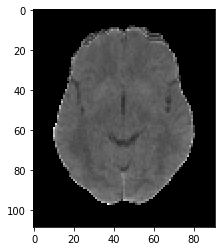


71877.92208022048
119533.03811021696
149107.15225507022
186394.472484512
221120.46296978323
221825.40554027774
401433.3213170758
771004.590465216
1133013.9874827266
1404539.9257664909
1661065.5926537355
1781173.7715527327
1930450.4597975947
2098869.494011928
2380082.443074551
2609930.096542252
3187847.4874625164
3407744.5943569597
3689339.3969626427
4007566.4593131007
4349195.176028442
4644840.362652723
4920524.603124574
5407966.79221391
5877222.560475796
6325747.25428617
6687518.861726917
7026900.771820964
7312941.245435813
7411598.668792777
7461188.636002475
7533141.105699502
7687637.267017505
7676606.362561431
7656930.0099097565
7627703.314896758
7518178.5961838495
7468273.67067908
7433195.446139736
7392922.854982556
7296440.764407197
7216758.974307944
7084867.885697631
6954721.466048392
6891228.125915464
6833310.85196908
6726362.182552319
6574532.1218212
6387840.29167211
6258428.800591461
6126334.474758064
5979082.650091628
5826177.443332851
5804104.53747153
5750893.288512156
5777

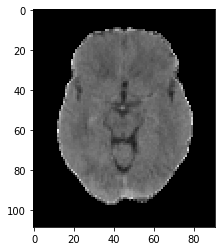


116318.76876986283
171128.71432869346
206229.3850384319
216538.82145817924
203768.27357540748
303730.1967296046
729717.3407536086
972440.3276384016
1320191.956283306
1533000.984061456
1594135.2742464917
1650686.69039614
1943371.4597338927
2380157.72922645
2599846.1329844315
2927634.2050358425
3125003.005633819
3452281.2812076146
3849667.42787808
4191755.4034757446
4459824.479812527
4810845.725709836
5154168.7465504585
5587990.031710448
5752764.2444633655
5876554.423824096
5998386.658151953
6184559.079689328
6335384.771391084
6568850.389753326
6830330.726931002
6801776.67442603
6777125.066490862
6707122.990735216
6630733.605100299
6560684.382370588
6443785.100261248
6364450.824741565
6328068.031116318
6341078.929122003
6294872.599384239
6212283.224095108
6131067.1492834035
5983035.31688357
5879617.375012739
5772370.827566455
5653644.13031683
5619766.042899697
5532469.1780171385
5461215.335328741
5451426.202929914
5502684.696929418
5551375.412654747
5509407.680357899
5413031.60732118
53

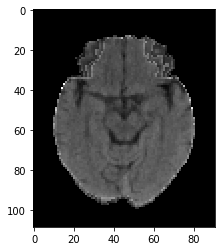


0.0
179090.31279406557
204834.51114228083
234746.42014432058
248178.10960263244
263355.57404391095
416983.6157212928
765874.5600387789
1336489.058760189
1654674.1850071242
1811488.7684638076
1999786.4466371883
2474281.100820842
2857934.736888119
3275445.0005221986
3490566.5186869833
3715531.918675279
3930702.342037379
4222477.046508424
4549366.316112439
4869395.442495844
5136208.013210602
5213531.2516212035
5309023.734058682
5916688.421998414
6290167.748092499
6436944.442386275
6599052.998988368
6863872.729768632
7094831.473290799
7297107.658440262
7460332.20983124
7491861.4045291385
7498516.499947466
7407719.082575225
7421598.102370973
7396224.574336738
7363827.423620709
7277435.320636463
7165506.540977542
7078176.398482426
6926357.812855292
6732743.764159389
6593721.604575829
6483090.891792244
6289552.8284444995
6177459.881163331
6015977.806074943
6001170.243550436
6000697.763806795
5850101.001069157
5796662.435424538
5777368.587142798
5767665.26332627
5731267.259746008
5557443.3536

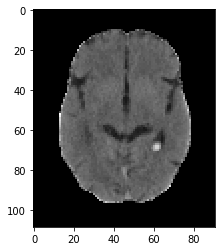

KeyboardInterrupt: Interrupted by user

In [14]:
def filter_slices(mask):
    negative = 1 - mask
    for ncct in nccts:
        scan = nib.load(ncct_dir+ncct).get_fdata()
        scores = []
        for i in range(scan.shape[-1]):
            ax_slice = scan[:,:,i]
#             ax_slice[ax_slice > 0] = 1
            score = (ax_slice*mask).sum() - (ax_slice*negative).sum()
            scores.append(score)
            print(score)
        i = np.argmax(scores)
        print(ncct)
        scan = nib.load(ncct_dir+ncct).get_fdata()
#         _, axs = plt.subplots(1, 5, figsize = (20,7))
#         for j in (-2,-1,0,1,2):
#             axs[j].imshow(np.flip(scan[:,:,i+j].T, 0), cmap = "gray")
        plt.imshow(np.flip(scan[:,:,i-2:i+2].mean(axis = 2).T), cmap = "gray")
        plt.show()
        input()
        
filter_slices(mask)

# Assert `RandomFlip` augmentation

In [13]:
not_flipped = []
for ncct in nccts:
    filename = ncct_dir+ncct
    normal = nib.load(filename).get_fdata()
    flipped = nib.load(filename.replace(".nii", "-RandomFlip.nii")).get_fdata()
    if (normal == flipped).all():
        not_flipped.append( filename.split("/")[-1].replace(".nii", "") )

In [14]:
not_flipped

[]

## Crazy idea - average all slices

(109, 91)


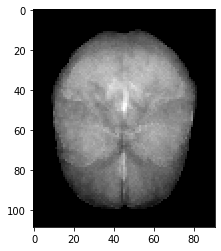


(109, 91)


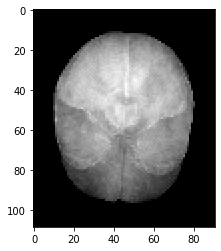


(109, 91)


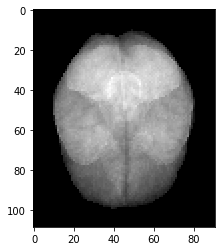


(109, 91)


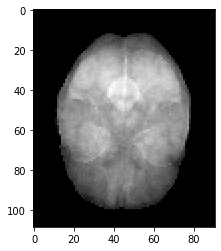


(109, 91)


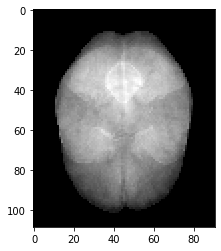


(109, 91)


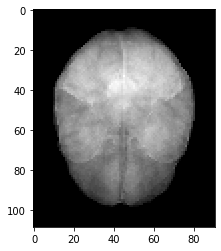


(109, 91)


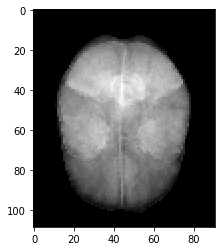


(109, 91)


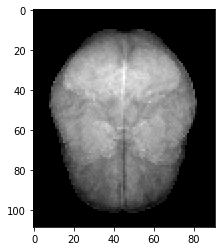


(109, 91)


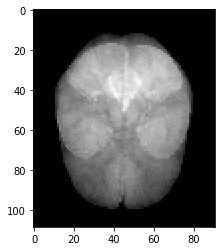


(109, 91)


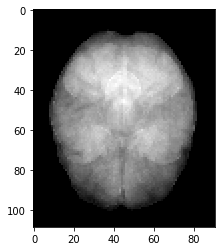


(109, 91)


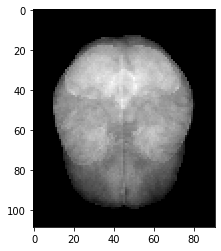


(109, 91)


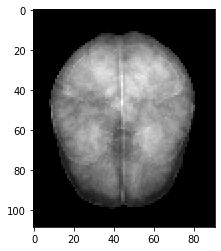


(109, 91)


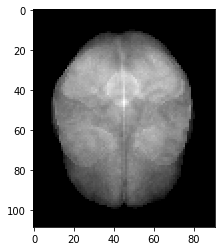


(109, 91)


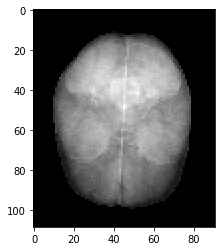


(109, 91)


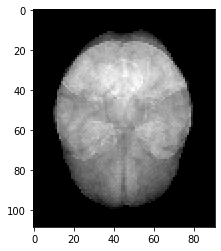


(109, 91)


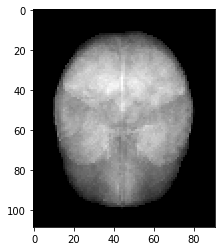


(109, 91)


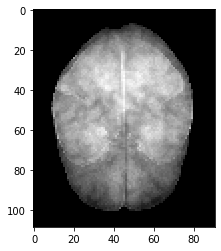


(109, 91)


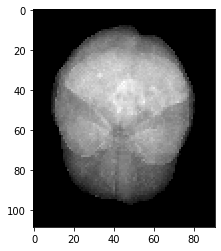


(109, 91)


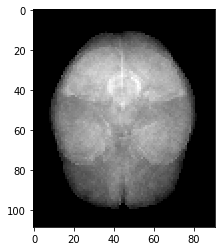


(109, 91)


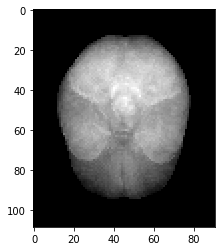


(109, 91)


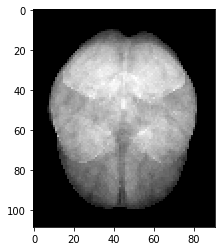


(109, 91)


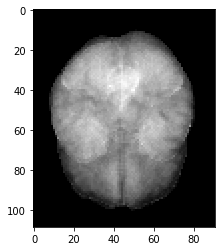


(109, 91)


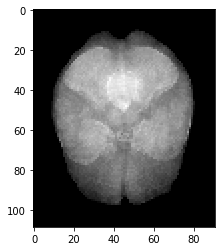


(109, 91)


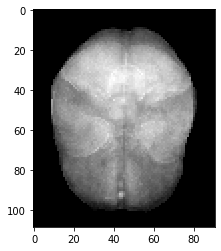


(109, 91)


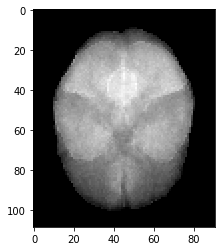


(109, 91)


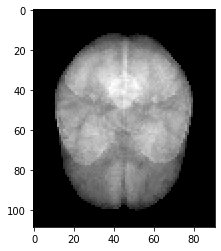


(109, 91)


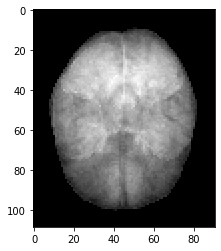


(109, 91)


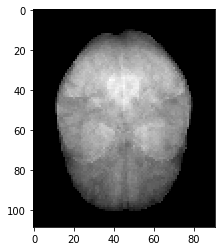


(109, 91)


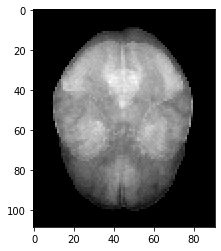


(109, 91)


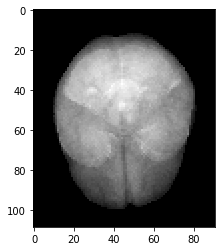


(109, 91)


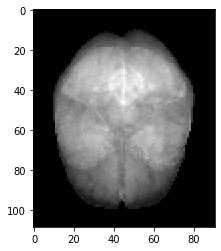


(109, 91)


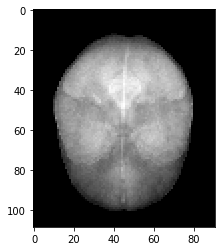


(109, 91)


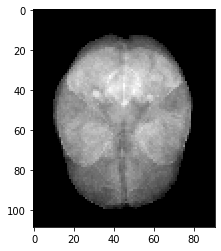


(109, 91)


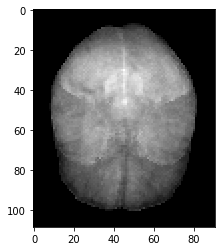


(109, 91)


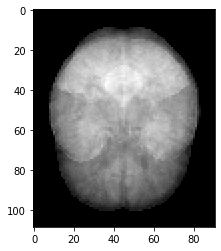


(109, 91)


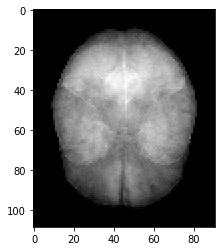


(109, 91)


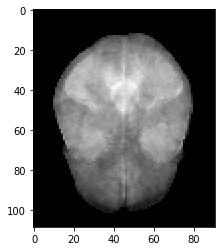


(109, 91)


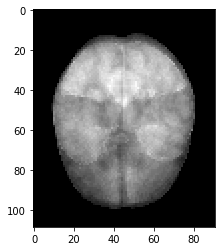


(109, 91)


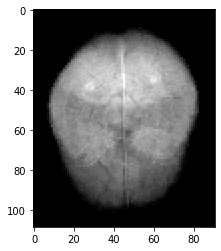


(109, 91)


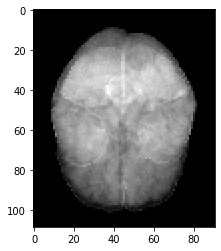


(109, 91)


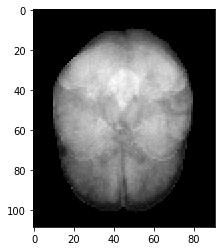


(109, 91)


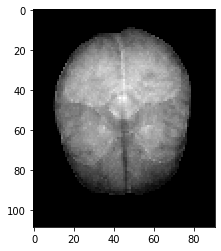


(109, 91)


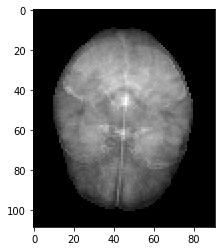


(109, 91)


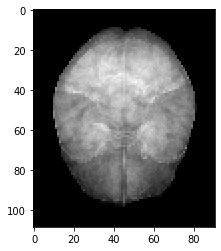


(109, 91)


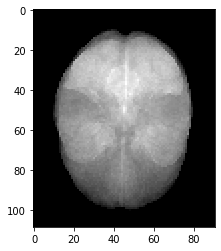


(109, 91)


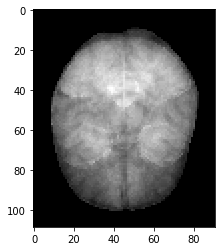


(109, 91)


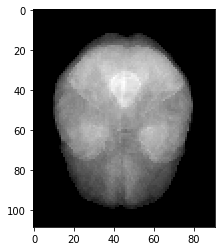


(109, 91)


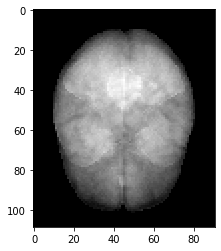


(109, 91)


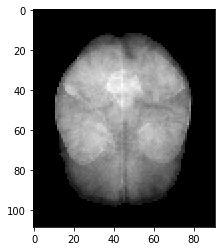


(109, 91)


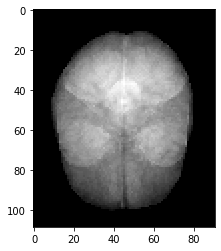


(109, 91)


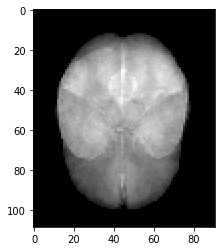


(109, 91)


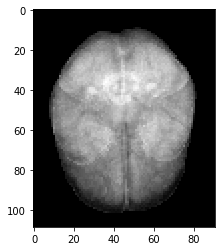


(109, 91)


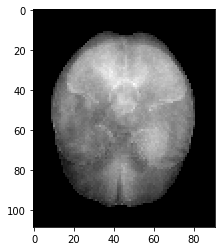


(109, 91)


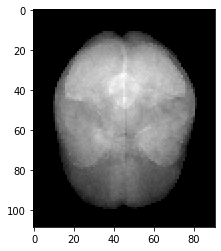


(109, 91)


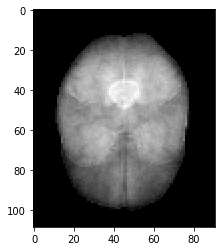


(109, 91)


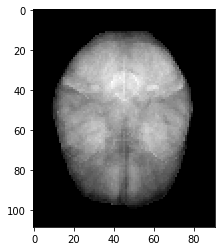


(109, 91)


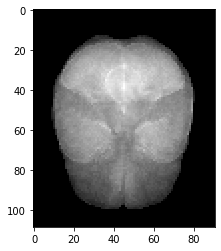


(109, 91)


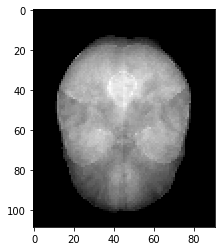


(109, 91)


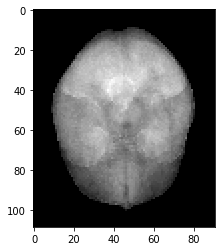


(109, 91)


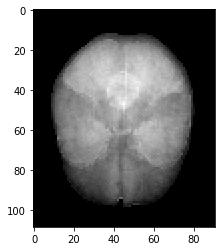


(109, 91)


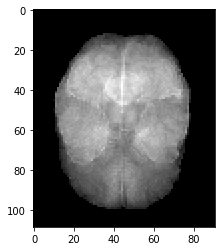


(109, 91)


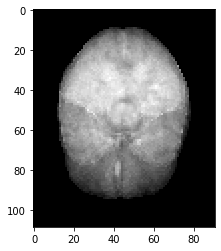


(109, 91)


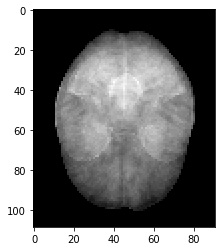


(109, 91)


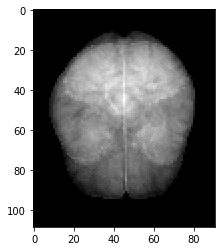


(109, 91)


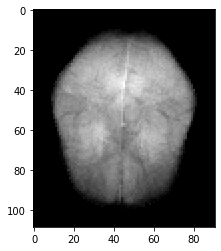


(109, 91)


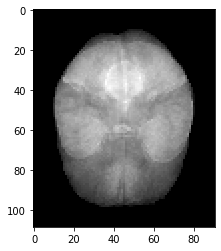


(109, 91)


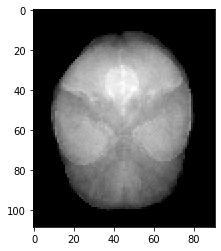


(109, 91)


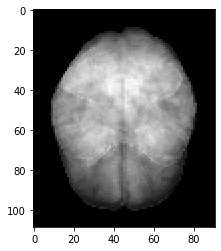


(109, 91)


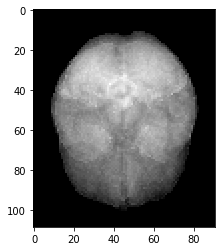


(109, 91)


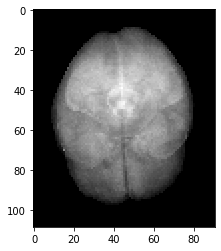


(109, 91)


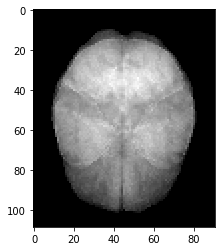


(109, 91)


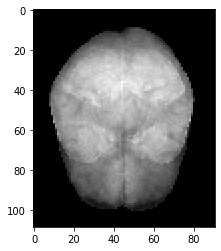


(109, 91)


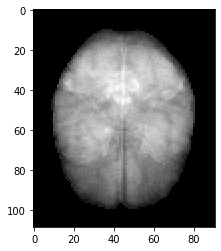

KeyboardInterrupt: Interrupted by user

In [36]:
for ncct in nccts:
    scan = nib.load(ncct_dir+ncct).get_fdata()
    i = 0
    while np.count_nonzero(scan[:,:,i] > 0) < 100:
        i += 1
    start = i
    while (i < scan.shape[-1]) and (np.count_nonzero(scan[:,:,i] > 0) > 100):
        i += 1
    end = i
    img = scan[:,:,start:end].mean(axis = 2).T
    print(img.shape)
#     img = np.flip(img, 0)
    plt.imshow(img, cmap = "gray")
    plt.show()
    input()
    plt.close()